In [48]:
#importing variables
# !pip install pandas_datareader
import pandas as pd
import numpy as np
import datetime as dt
import pandas_datareader as pdr
import seaborn as sns
import matplotlib.pyplot as plt
# https://towardsdatascience.com/building-a-comprehensive-set-of-technical-indicators-in-python-for-quantitative-trading-8d98751b5fb

#extracting data from Yahoo Finance API
tickers = ['AAPL','NFLX','SBIN.NS']
tickers = ['ASIANPAINT.NS', 'BEL.NS', 'BHARTIARTL.NS', 'DABUR.NS', 'GODREJCP.NS', 'HCLTECH.NS', 'HDFCBANK.NS', 'HINDUNILVR.NS', 'INDUSINDBK.NS', 'ITC.NS', 'JUBLFOOD.NS', 'KOTAKBANK.NS', 'LT.NS', 'MARUTI.NS', 'PIDILITIND.NS', 'PIIND.NS', 'RELIANCE.NS', 'TCS.NS', 'TECHM.NS', 'TITAN.NS', 'WIPRO.NS', 'ABB.NS', 'AXISBANK.NS', 'BAJAJFINSV.NS', 'BIOCON.NS', 'CONCOR.NS', 'HAVELLS.NS', 'HDFC.NS', 'INDHOTEL.NS', 'INFY.NS', 'KAJARIACER.NS', 'LALPATHLAB.NS', 'PCJEWELLER.NS', 'SBILIFE.NS', 'SBIN.NS', 'TATASTEEL.NS', 'TCIEXP.NS', 'TRENT.NS']
all_data = pd.DataFrame()
test_data = pd.DataFrame()
no_data = []

for i in tickers:
    try:
        print("Working on : ",i)
        test_data = pdr.get_data_yahoo(i, start = dt.datetime(2021,1,1), end = dt.date.today())
        test_data['symbol'] = i
        all_data = all_data.append(test_data)
    except:
        no_data.append(i)

#Creating Return column
all_data['return'] = all_data.groupby('symbol')['Close'].pct_change() 

Working on :  ASIANPAINT.NS
Working on :  BEL.NS
Working on :  BHARTIARTL.NS
Working on :  DABUR.NS
Working on :  GODREJCP.NS
Working on :  HCLTECH.NS
Working on :  HDFCBANK.NS
Working on :  HINDUNILVR.NS
Working on :  INDUSINDBK.NS
Working on :  ITC.NS
Working on :  JUBLFOOD.NS
Working on :  KOTAKBANK.NS
Working on :  LT.NS
Working on :  MARUTI.NS
Working on :  PIDILITIND.NS
Working on :  PIIND.NS
Working on :  RELIANCE.NS
Working on :  TCS.NS
Working on :  TECHM.NS
Working on :  TITAN.NS
Working on :  WIPRO.NS
Working on :  ABB.NS
Working on :  AXISBANK.NS
Working on :  BAJAJFINSV.NS
Working on :  BIOCON.NS
Working on :  CONCOR.NS
Working on :  HAVELLS.NS
Working on :  HDFC.NS
Working on :  INDHOTEL.NS
Working on :  INFY.NS
Working on :  KAJARIACER.NS
Working on :  LALPATHLAB.NS
Working on :  PCJEWELLER.NS
Working on :  SBILIFE.NS
Working on :  SBIN.NS
Working on :  TATASTEEL.NS
Working on :  TCIEXP.NS
Working on :  TRENT.NS


In [49]:
#Simple Moving Average
all_data['SMA_5'] = all_data.groupby('symbol')['Close'].transform(lambda x: x.rolling(window = 5).mean())
all_data['SMA_15'] = all_data.groupby('symbol')['Close'].transform(lambda x: x.rolling(window = 15).mean())
all_data['SMA_ratio'] = all_data['SMA_15'] / all_data['SMA_5']
# all_data[all_data['symbol']=='SBIN.NS']

In [50]:
# # all_data[all_data['symbol']=='SBIN.NS']
# tickers
# all_data[all_data.symbol=='SBIN.NS'].loc[start:end,['Close','SMA_5','SMA_15']]

working for ASIANPAINT.NS


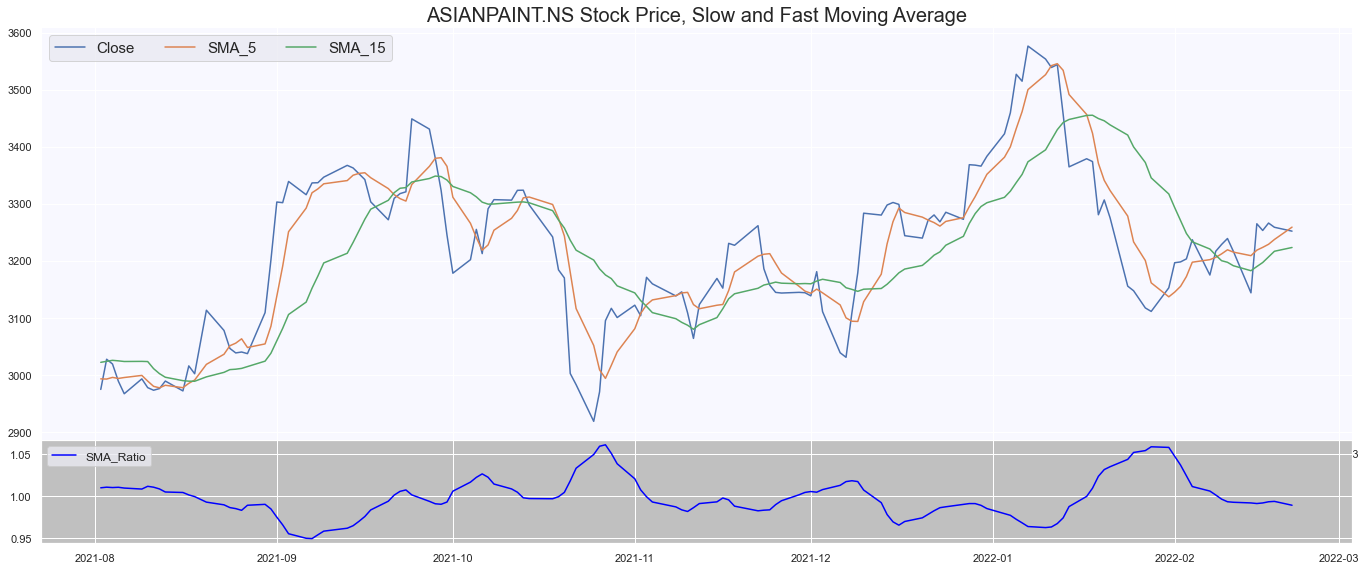

working for BEL.NS


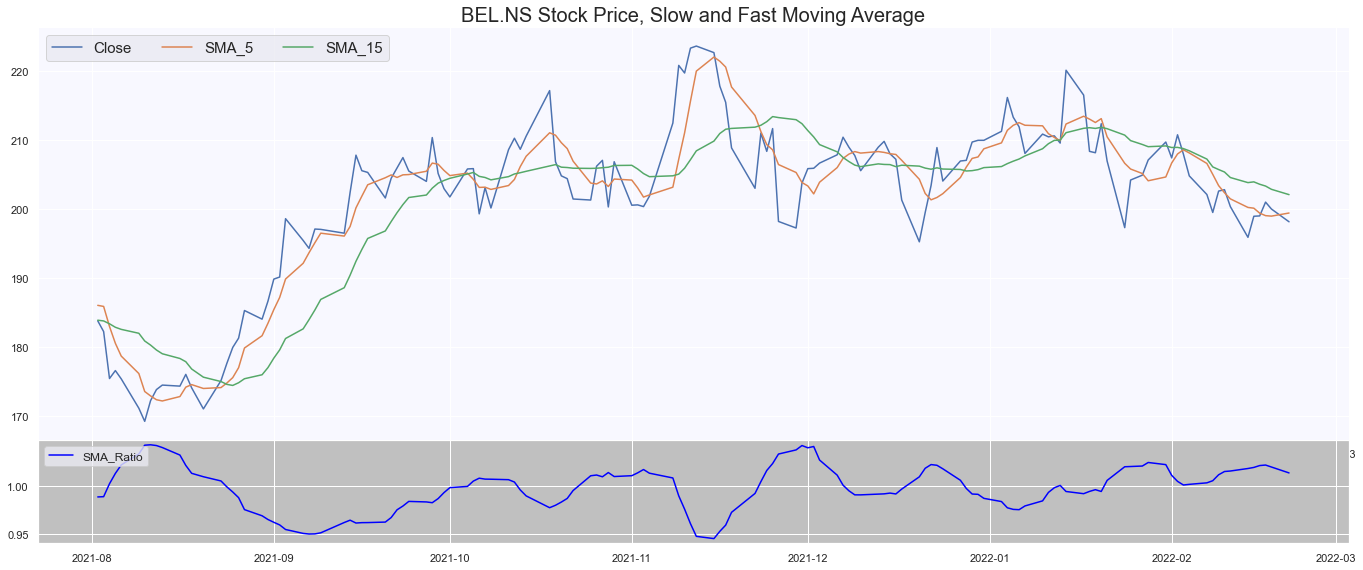

working for BHARTIARTL.NS


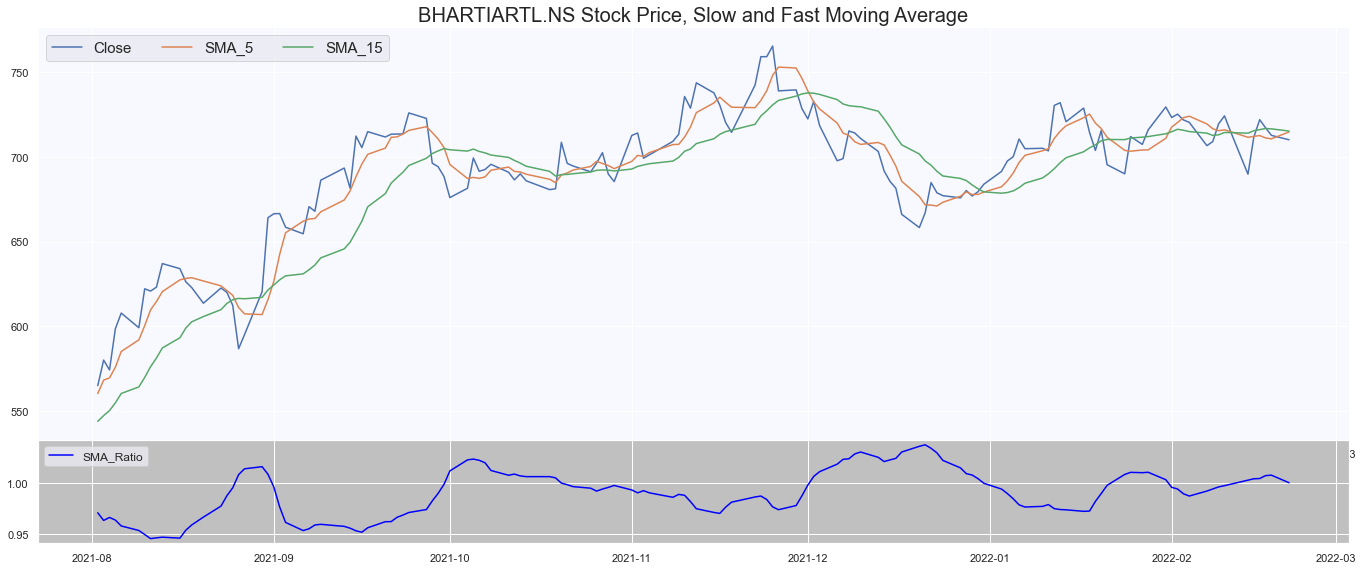

working for DABUR.NS


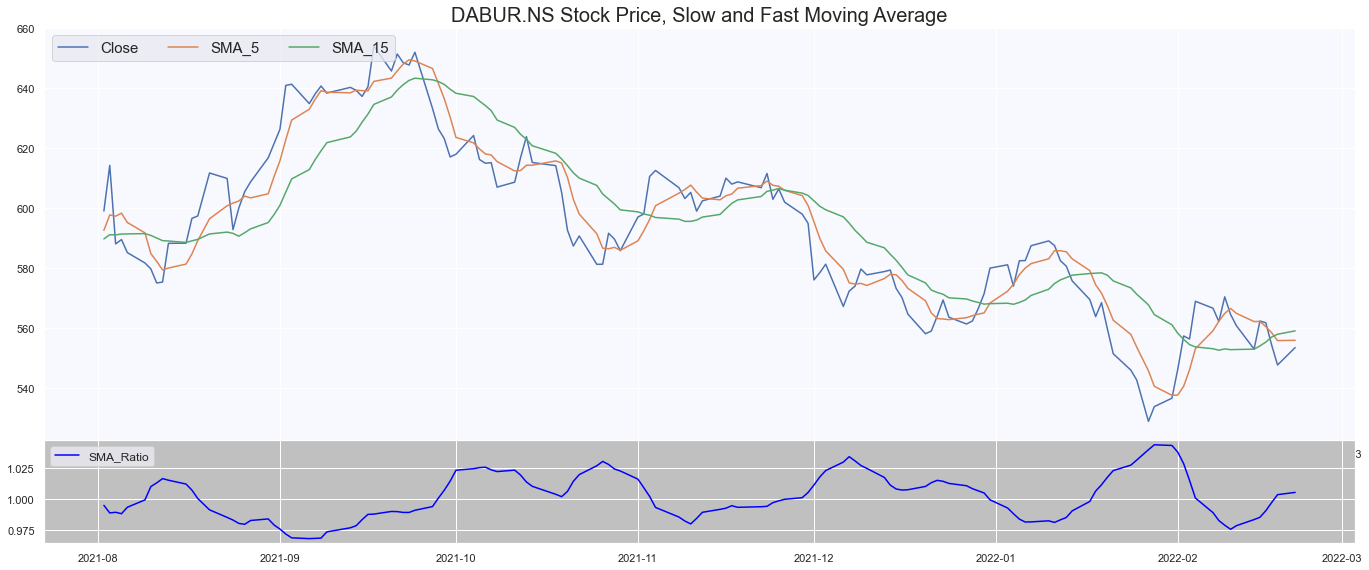

working for GODREJCP.NS


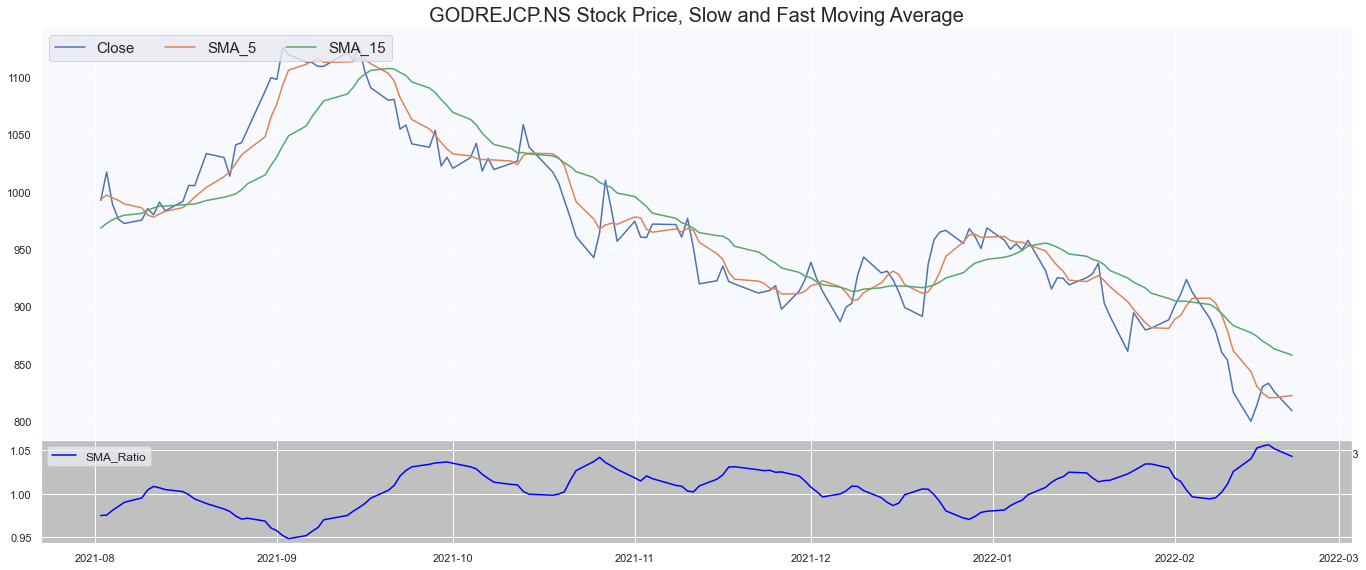

working for HCLTECH.NS


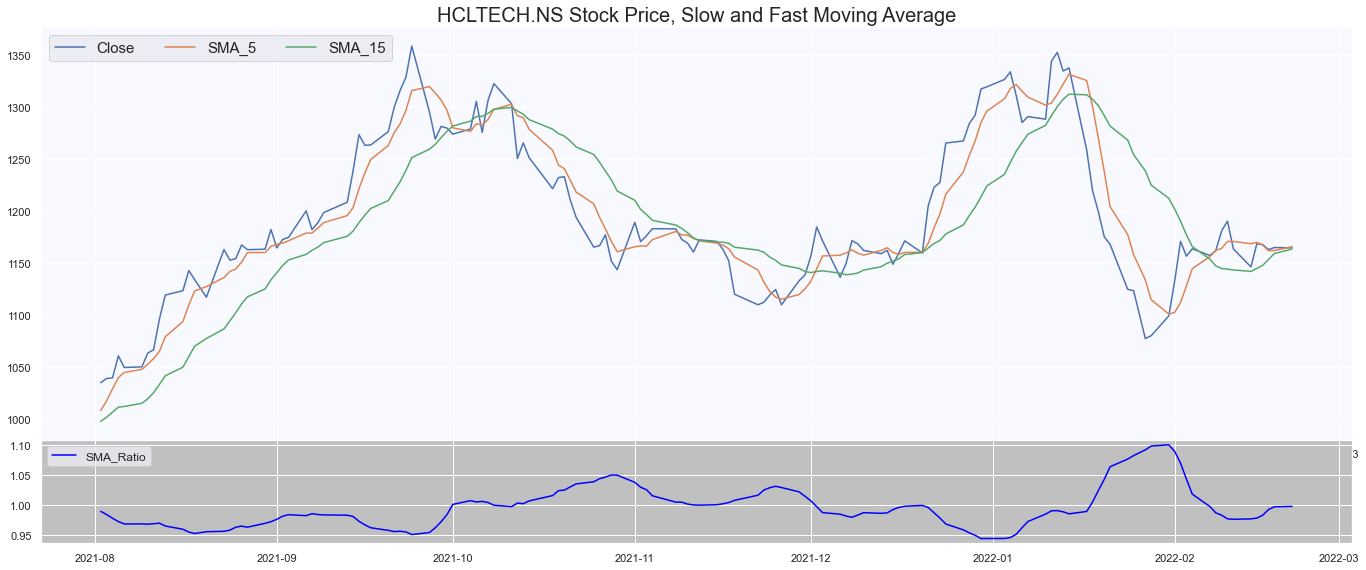

working for HDFCBANK.NS


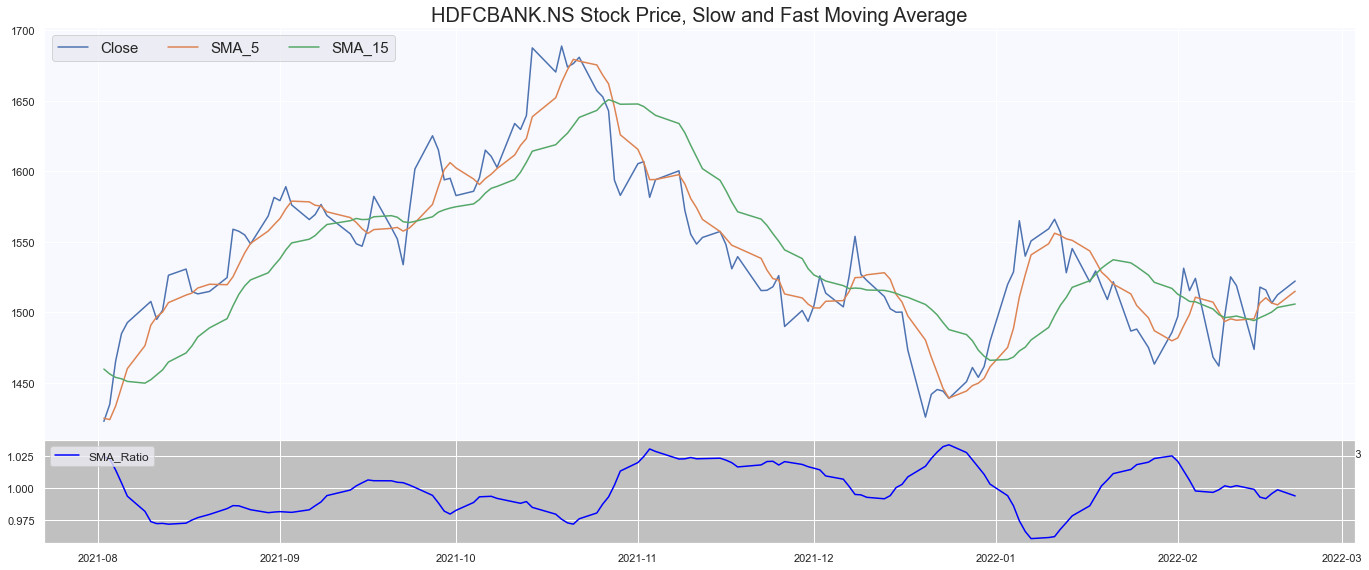

working for HINDUNILVR.NS


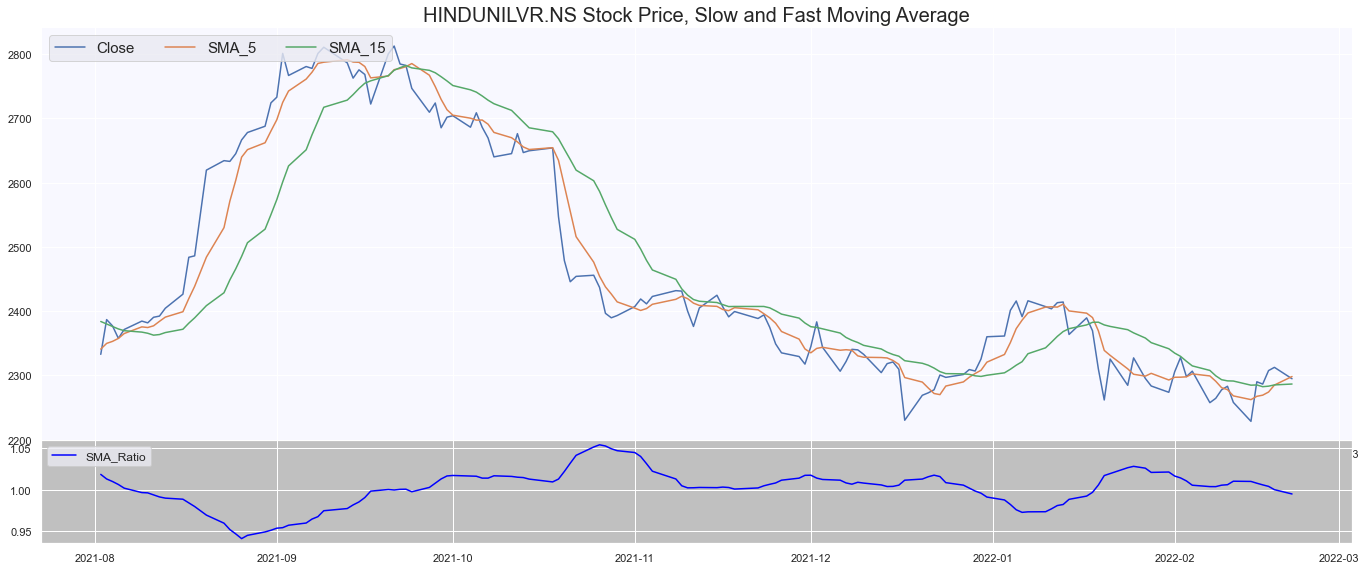

working for INDUSINDBK.NS


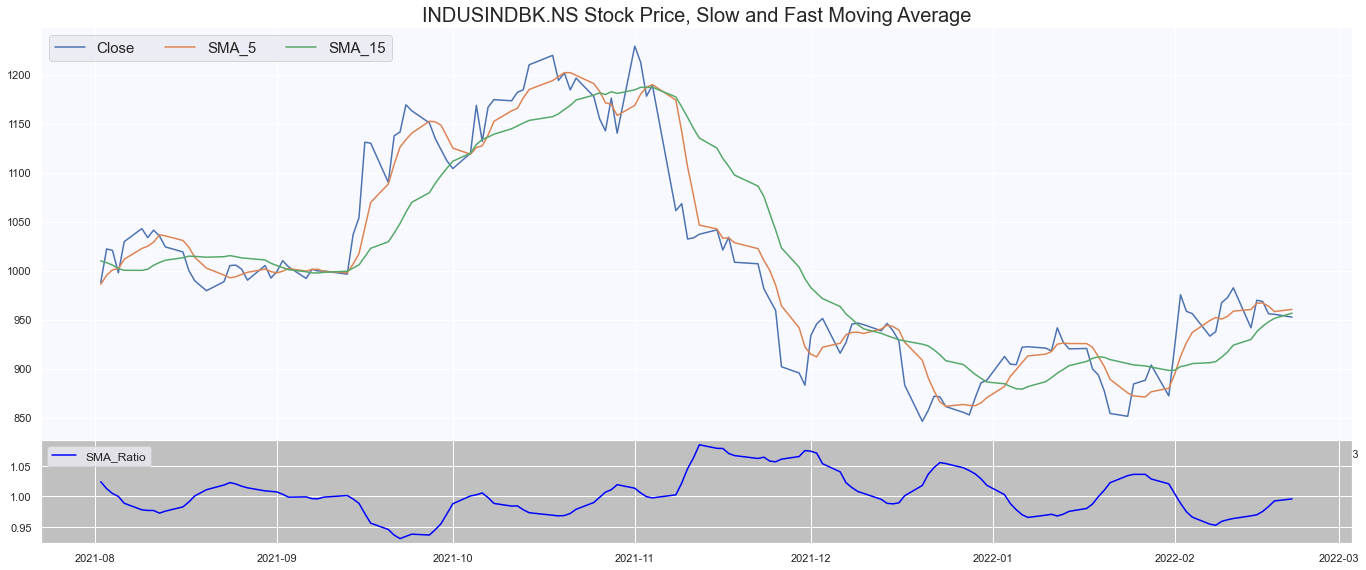

working for ITC.NS


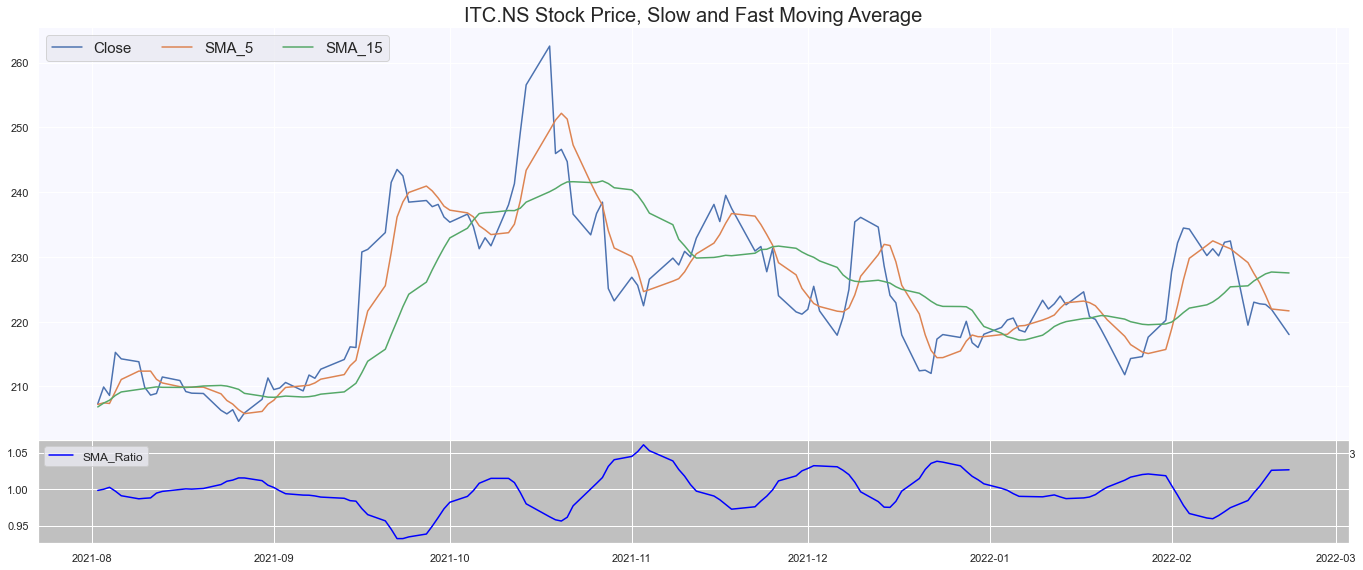

working for JUBLFOOD.NS


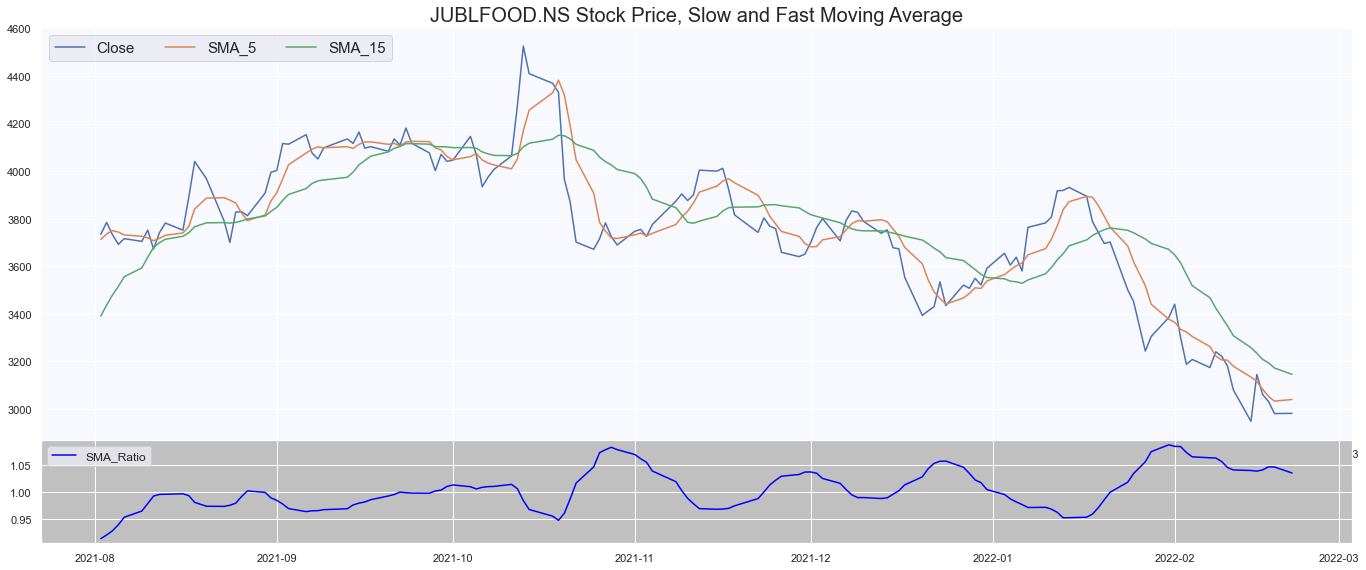

working for KOTAKBANK.NS


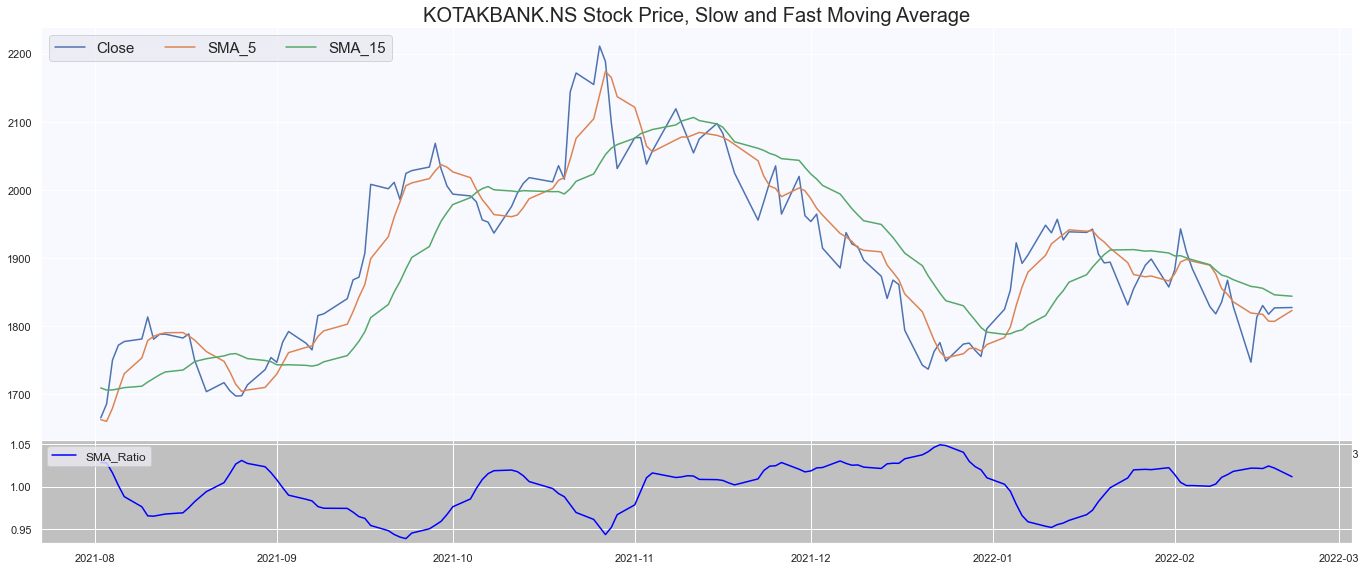

working for LT.NS


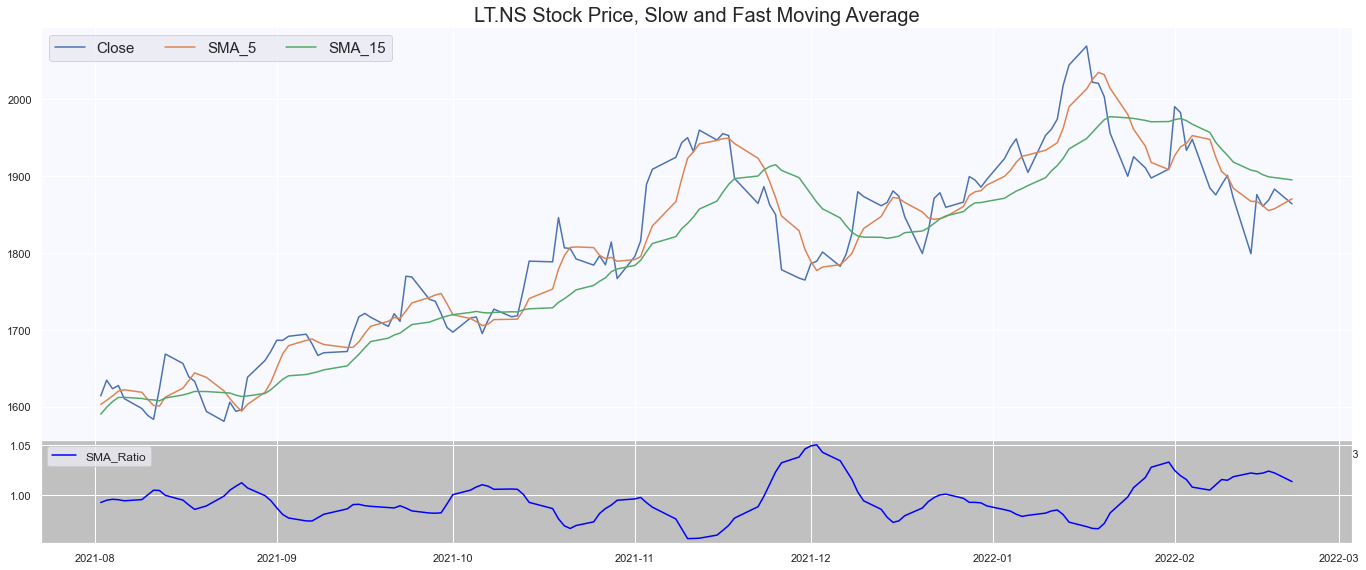

working for MARUTI.NS


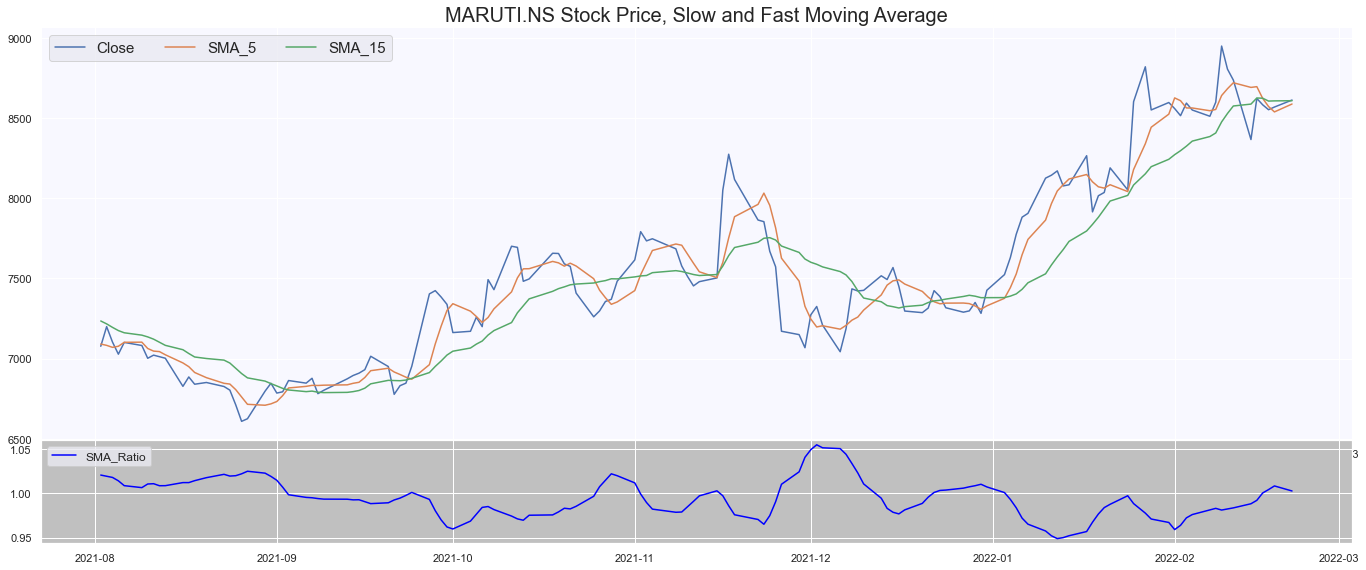

working for PIDILITIND.NS


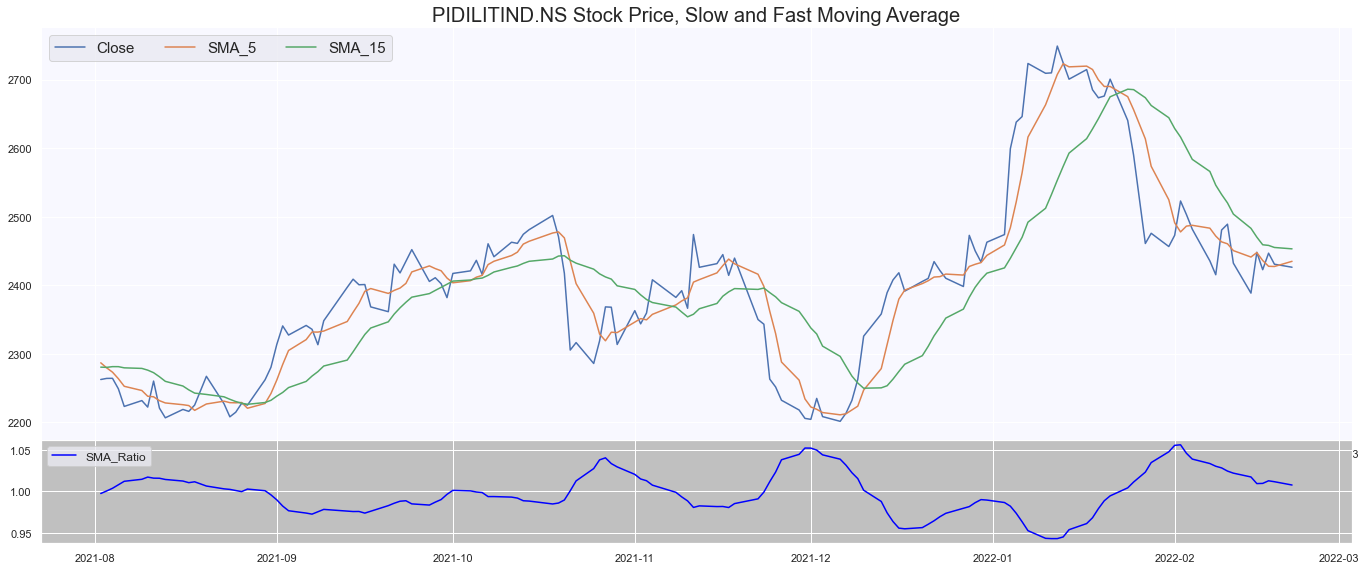

working for PIIND.NS


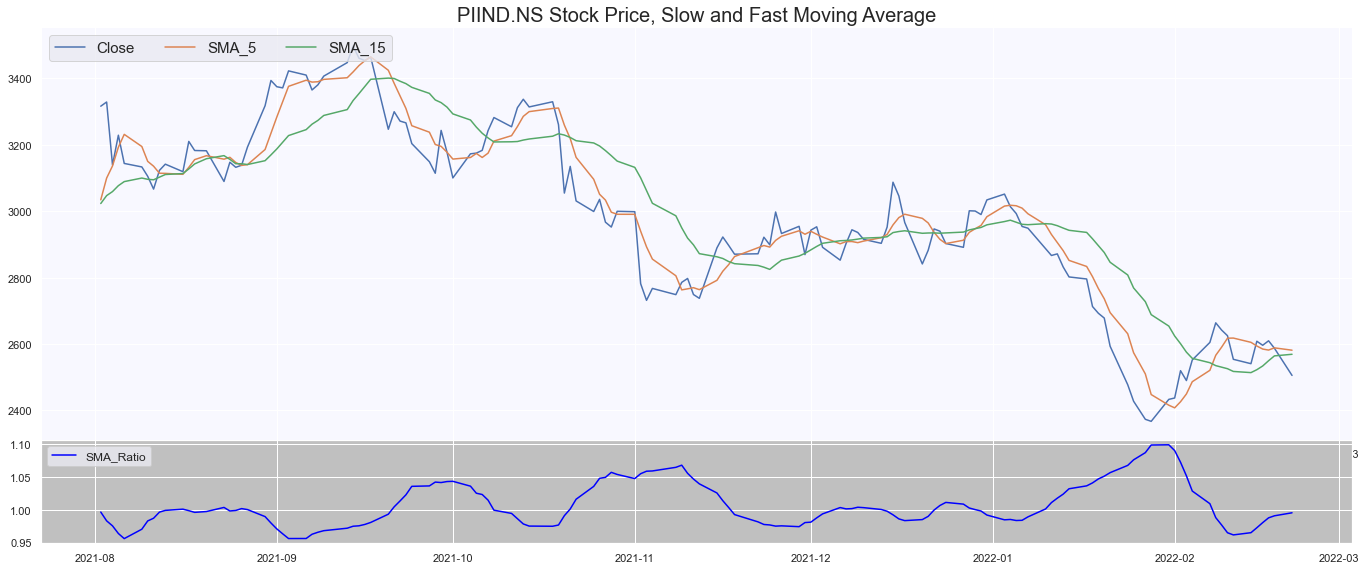

working for RELIANCE.NS


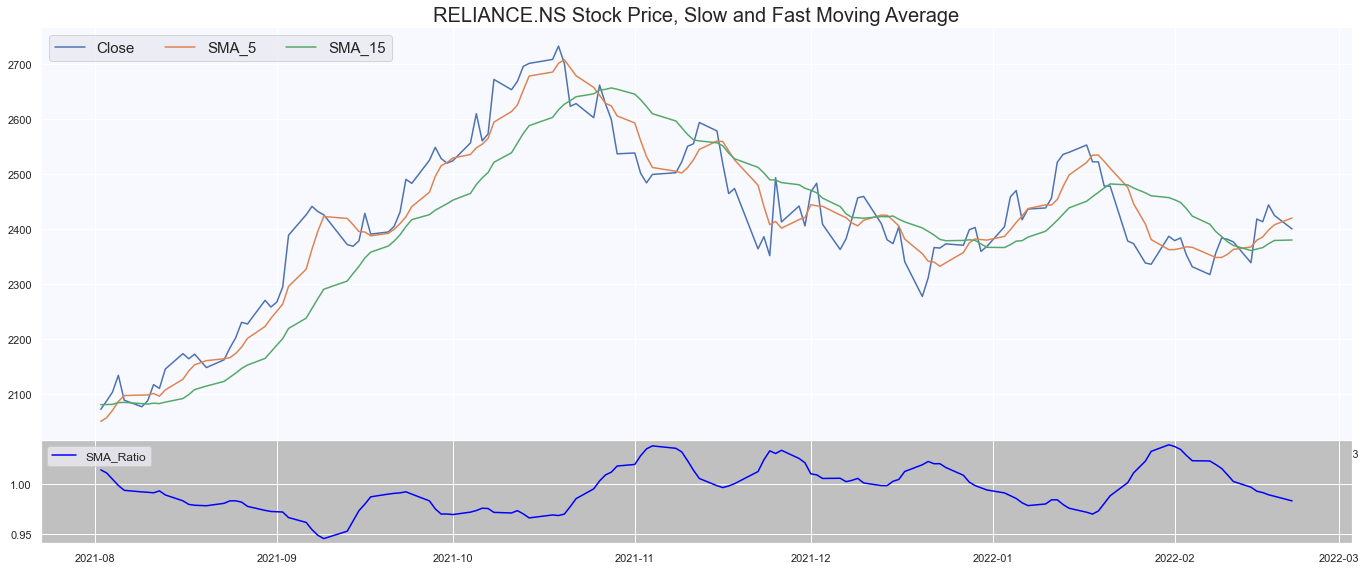

working for TCS.NS


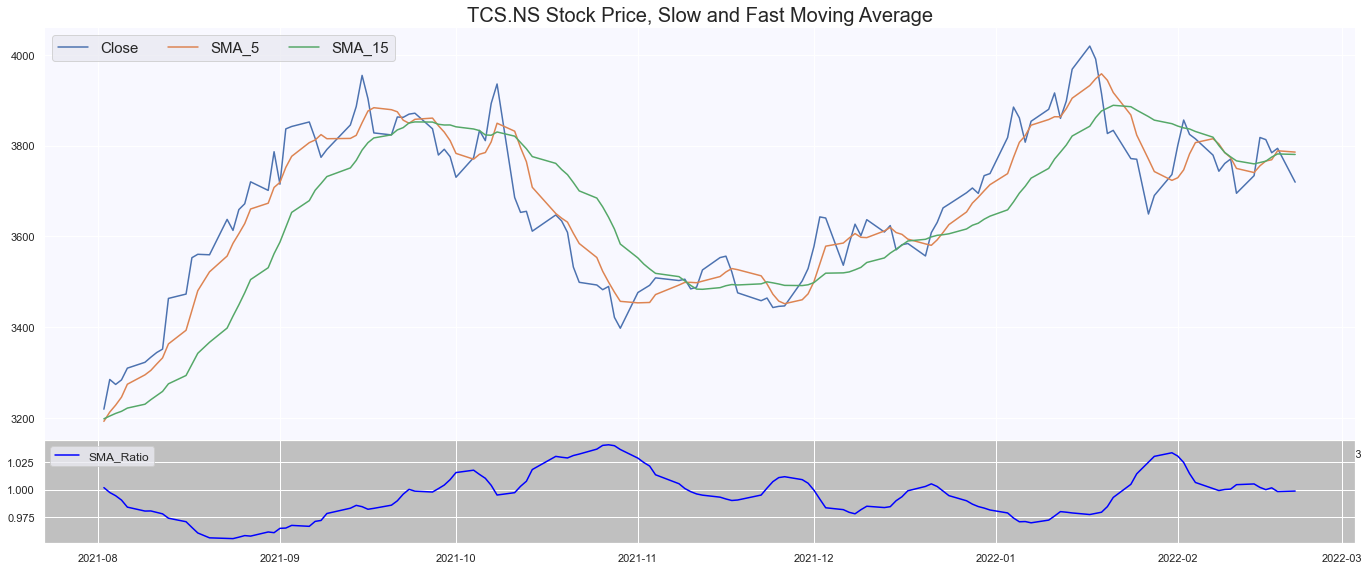

working for TECHM.NS


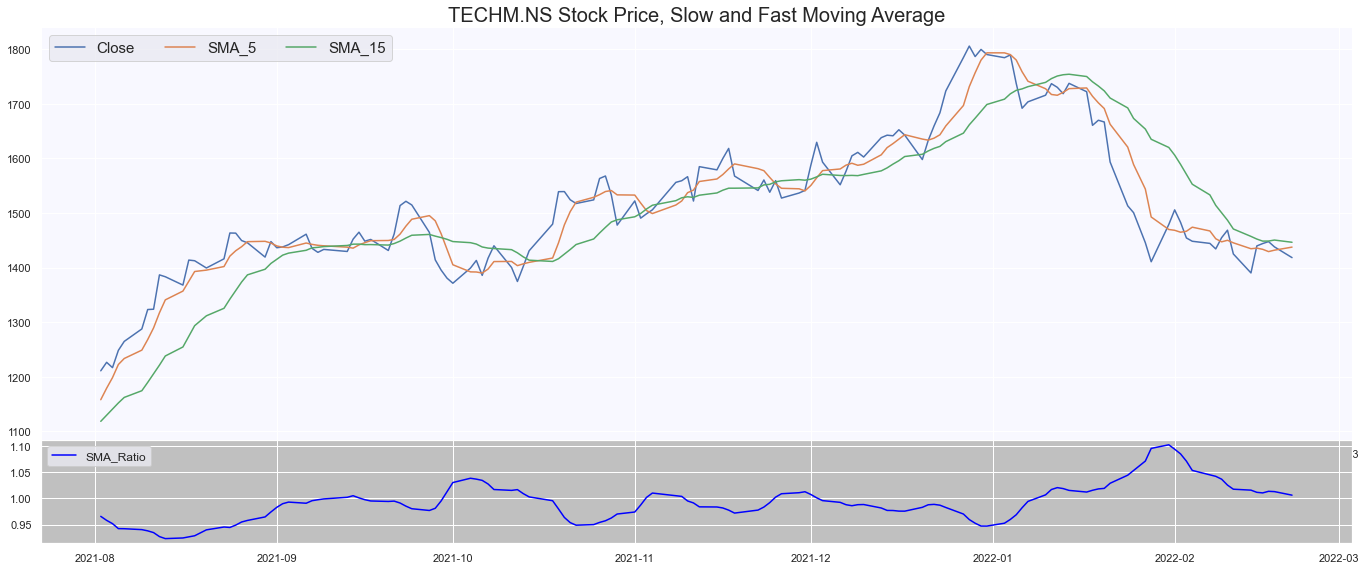

working for TITAN.NS


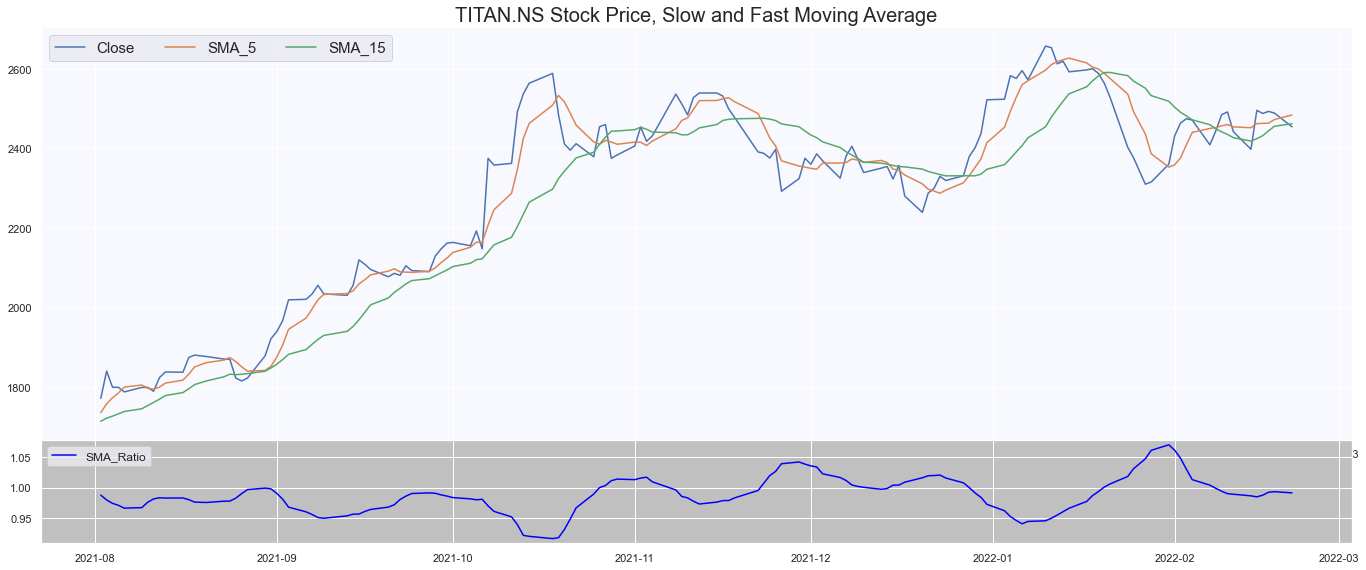

working for WIPRO.NS


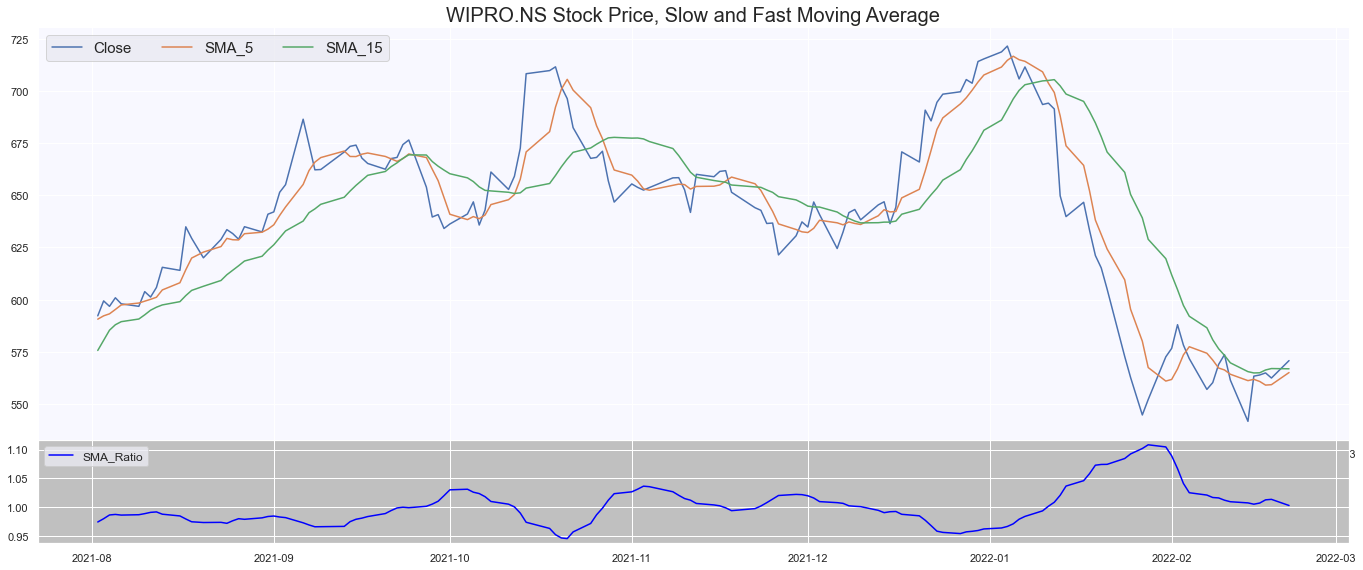

working for ABB.NS


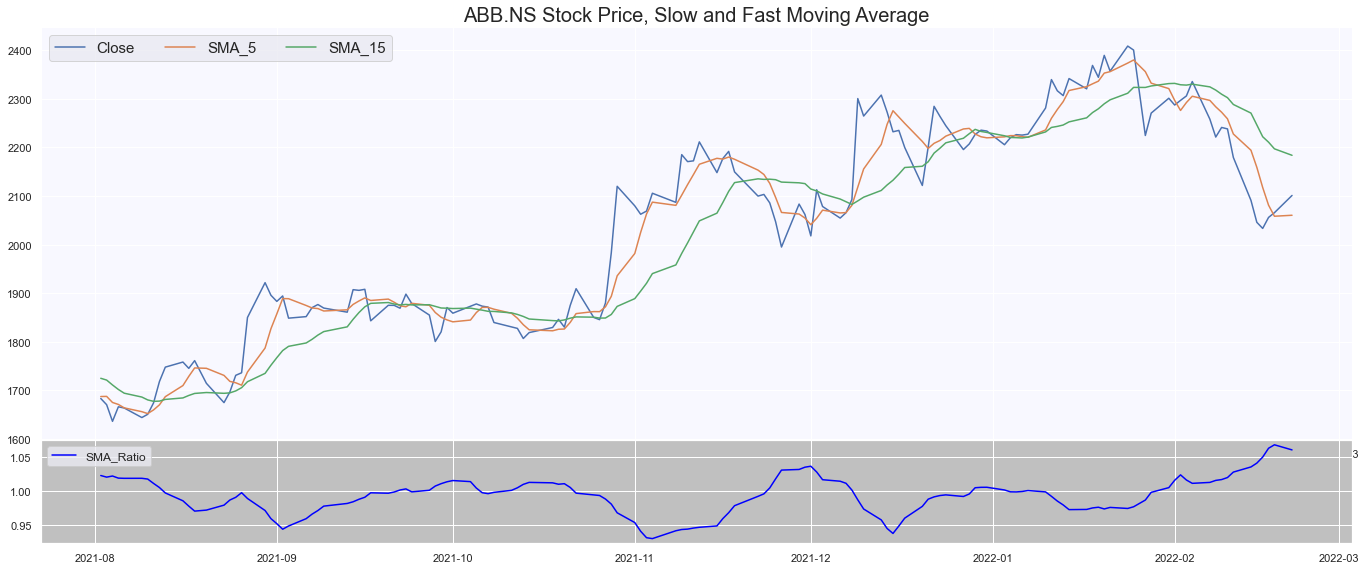

working for AXISBANK.NS


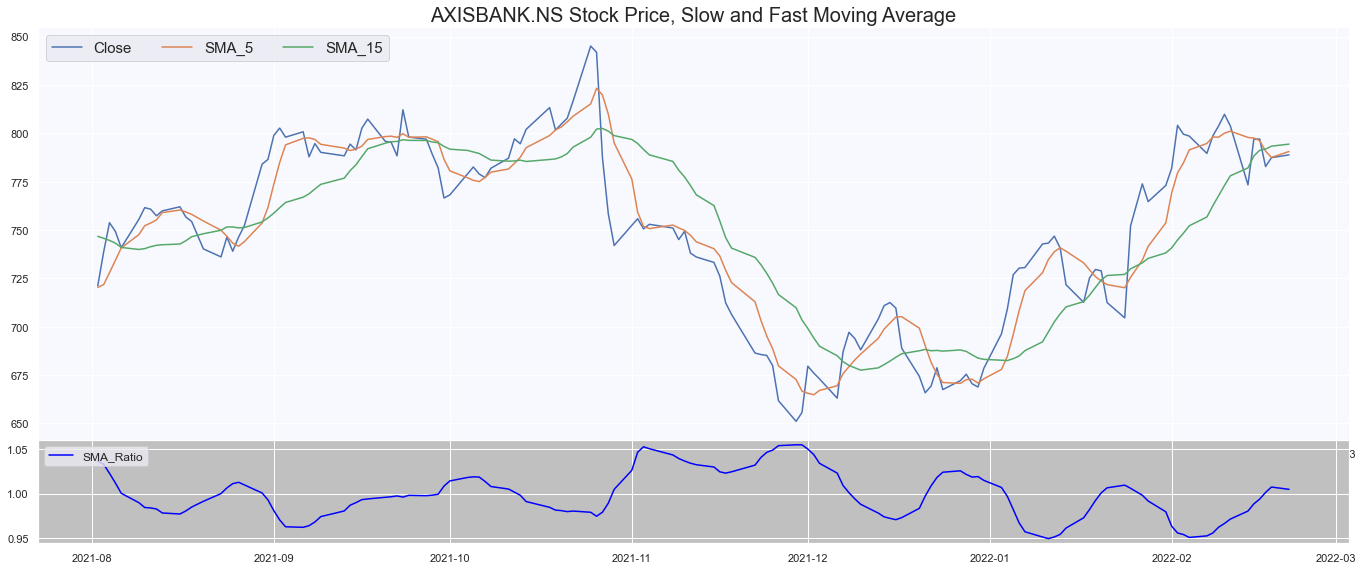

working for BAJAJFINSV.NS


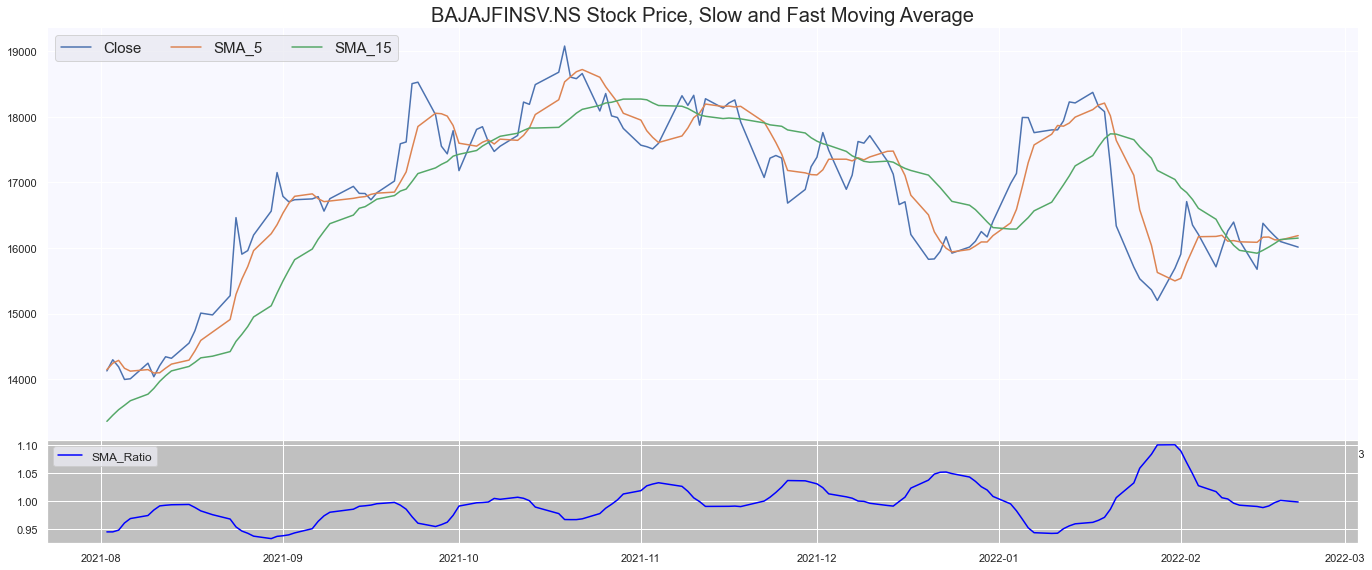

working for BIOCON.NS


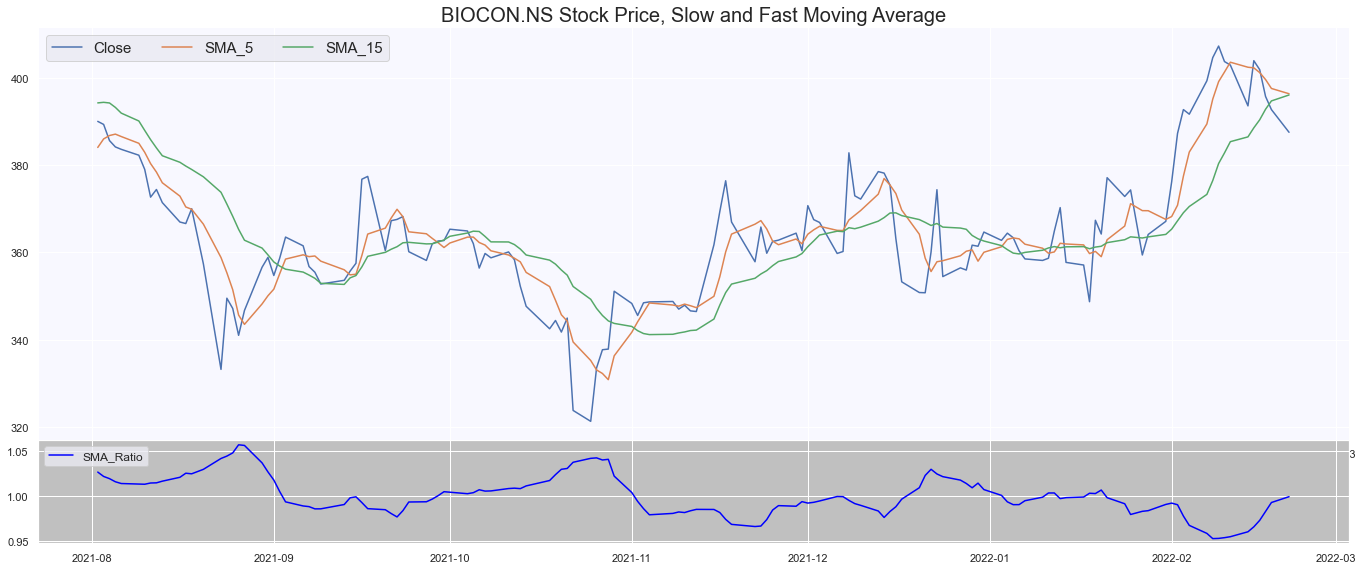

working for CONCOR.NS


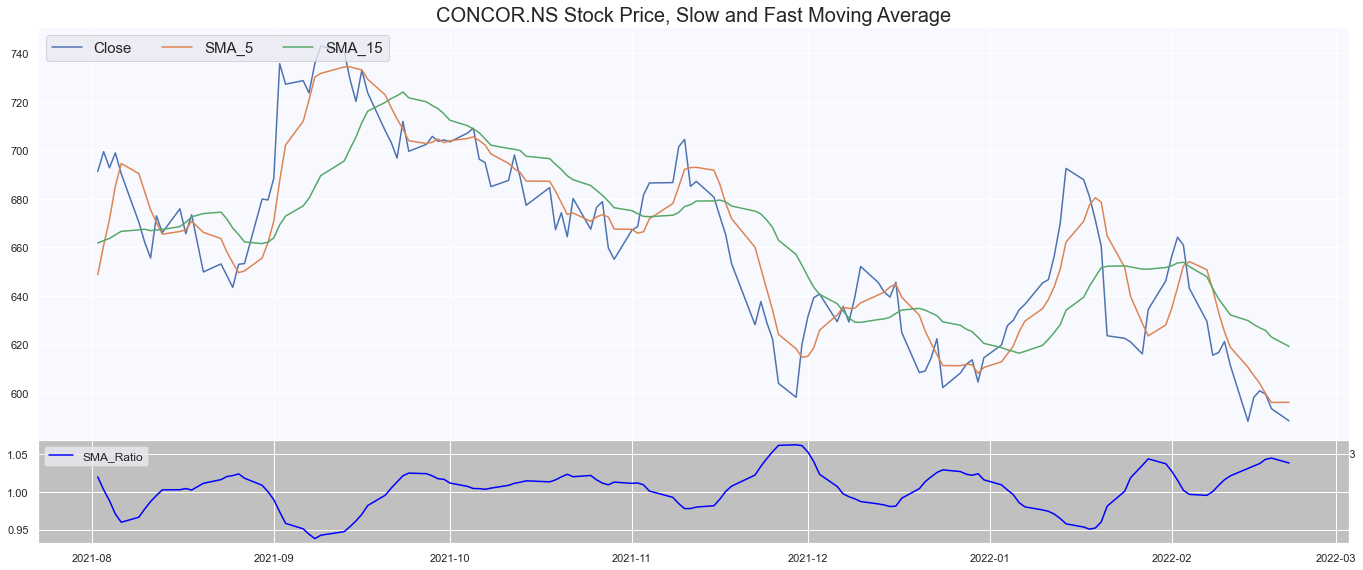

working for HAVELLS.NS


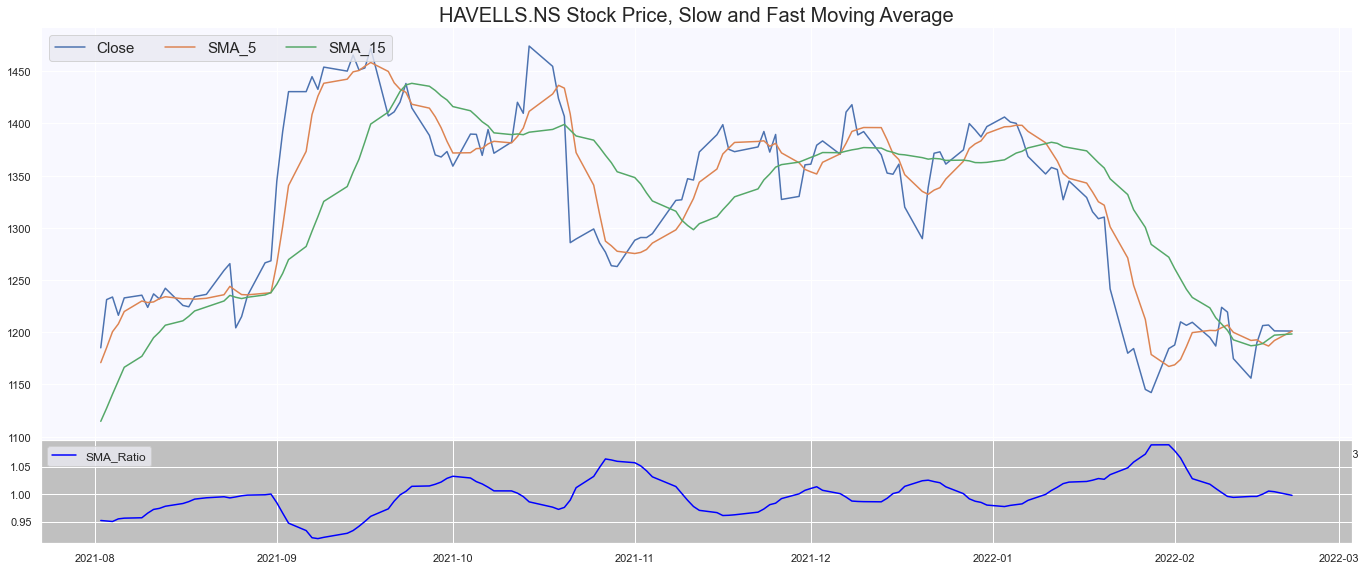

working for HDFC.NS


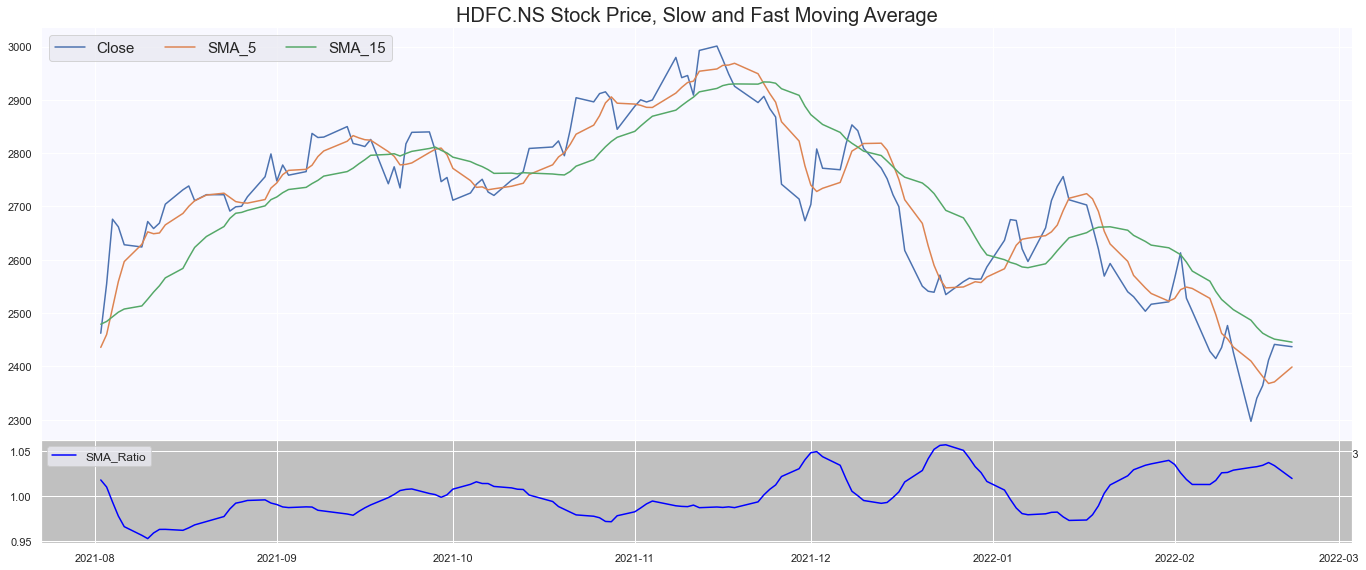

working for INDHOTEL.NS


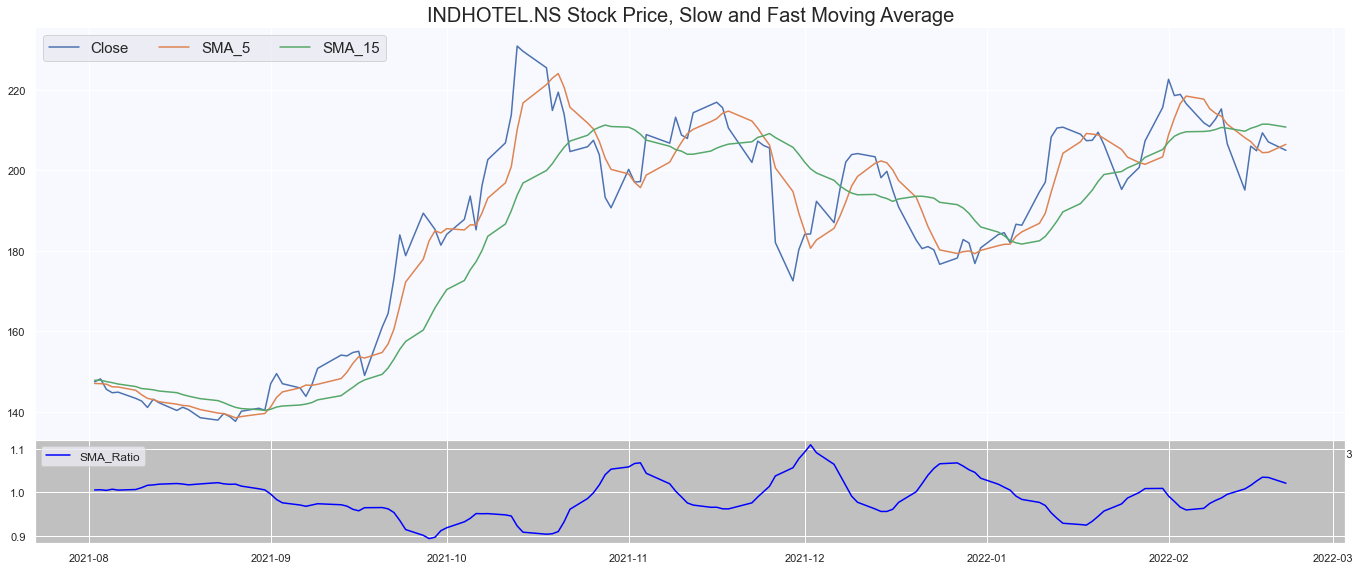

working for INFY.NS


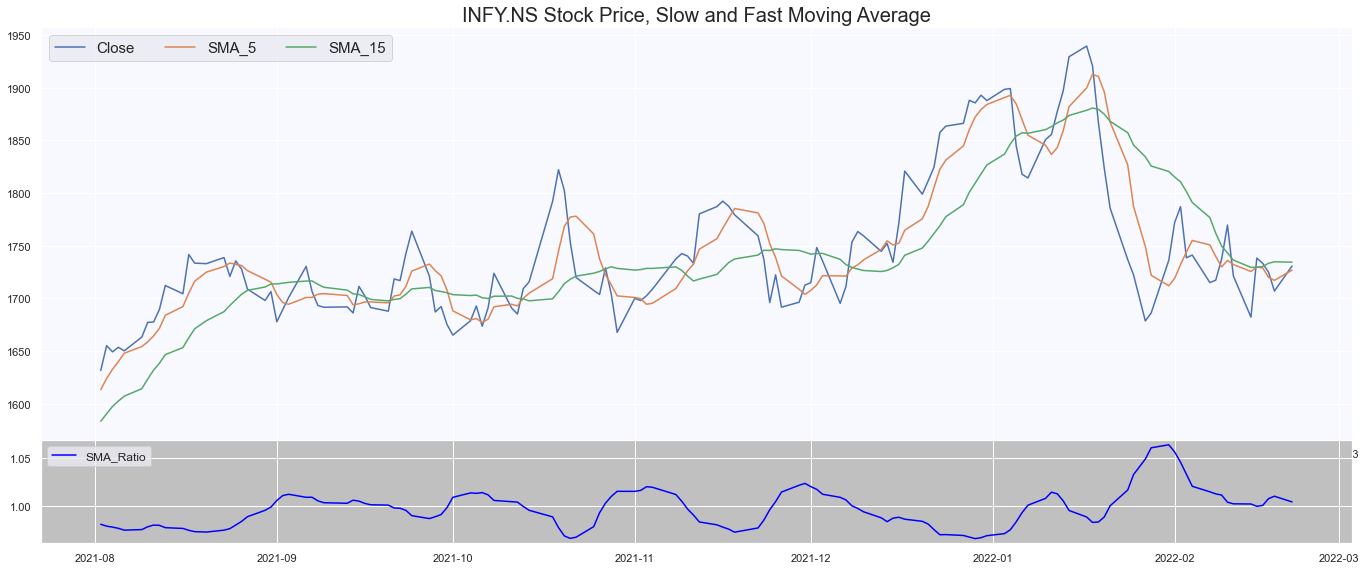

working for KAJARIACER.NS


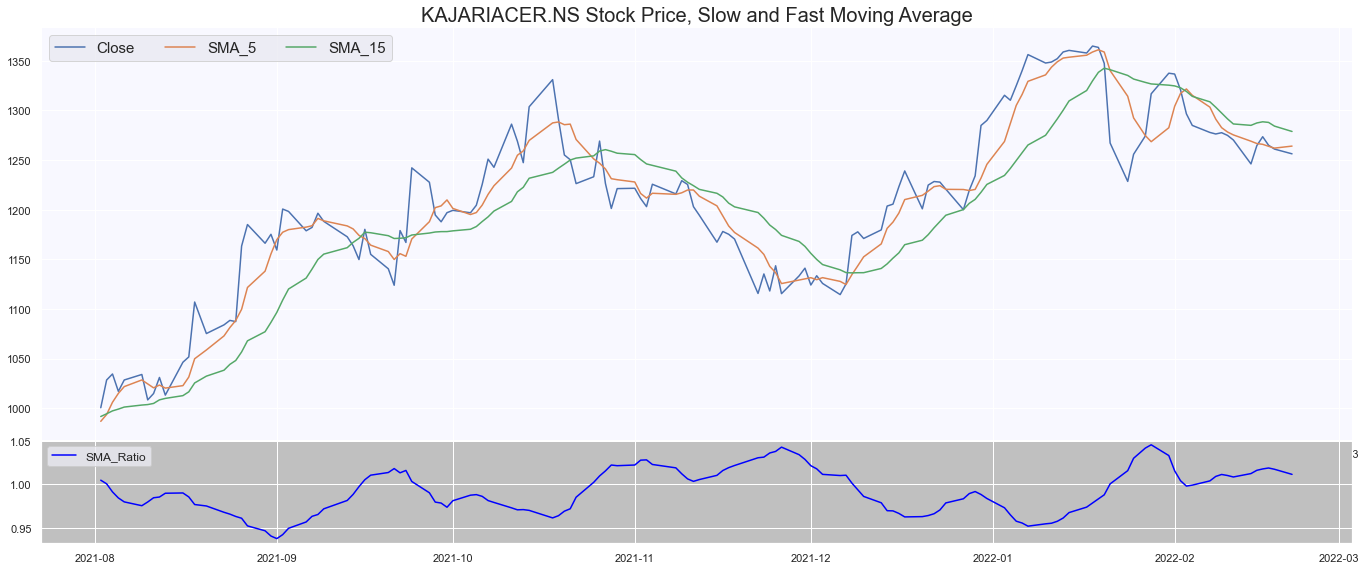

working for LALPATHLAB.NS


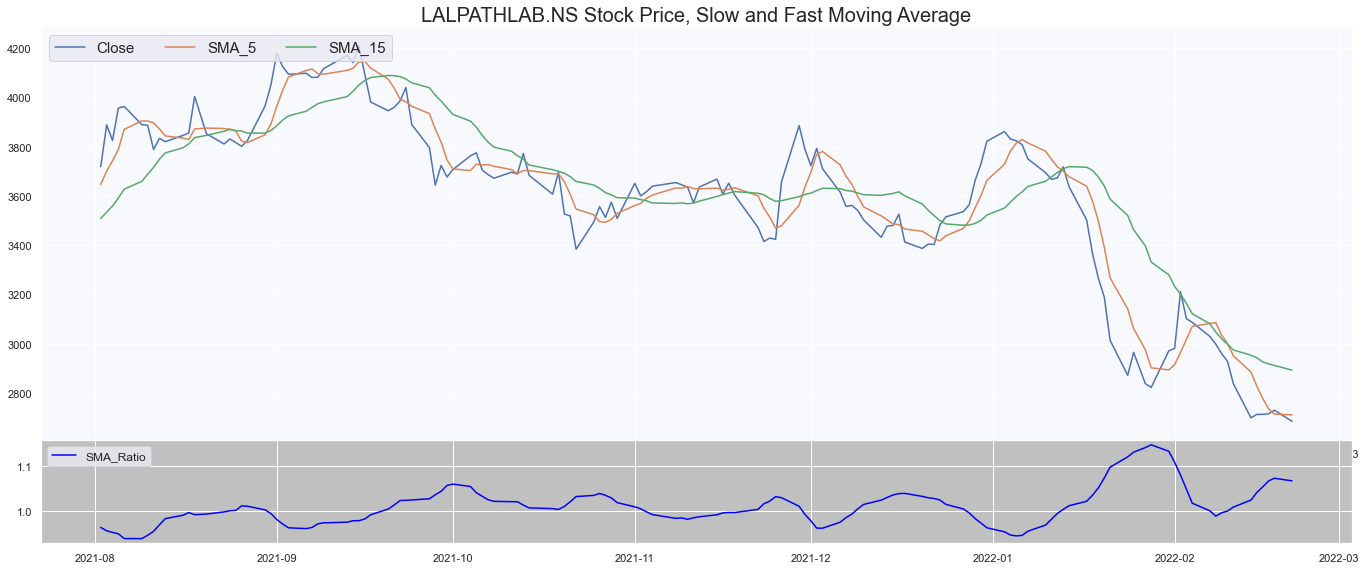

working for PCJEWELLER.NS


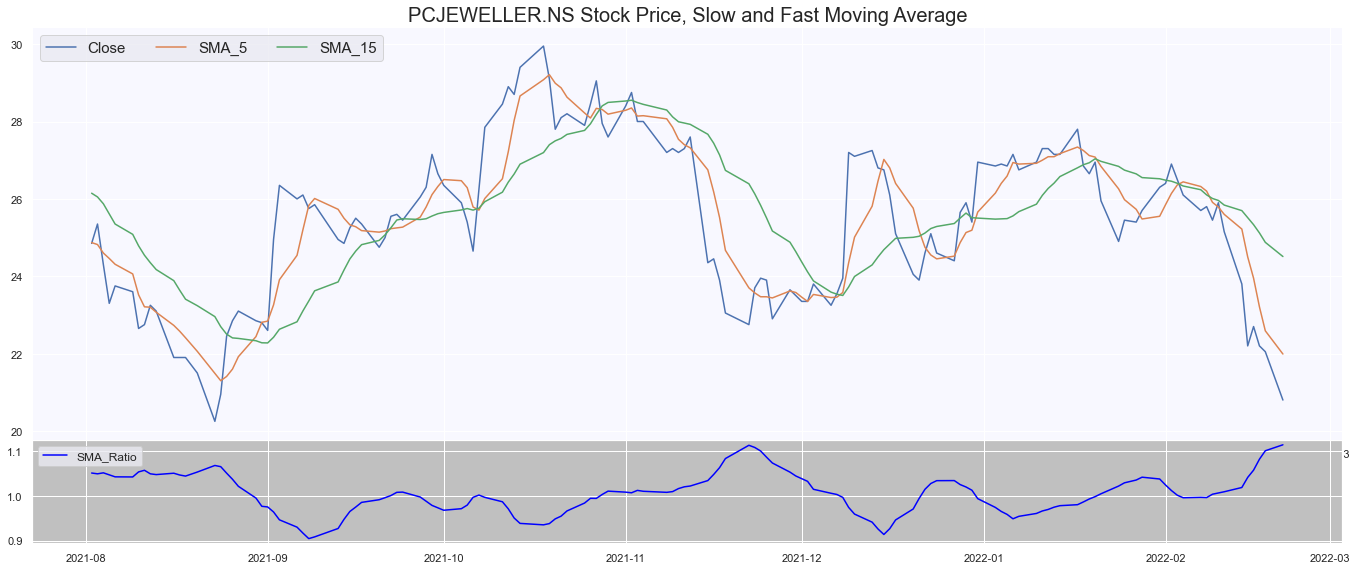

working for SBILIFE.NS


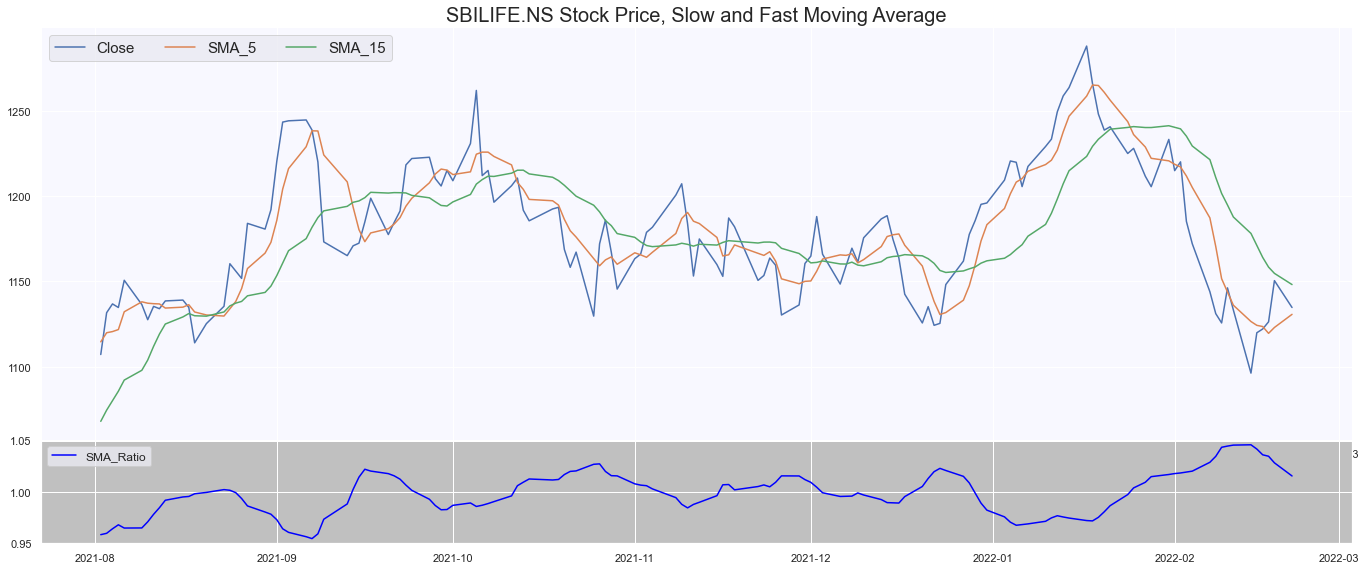

working for SBIN.NS


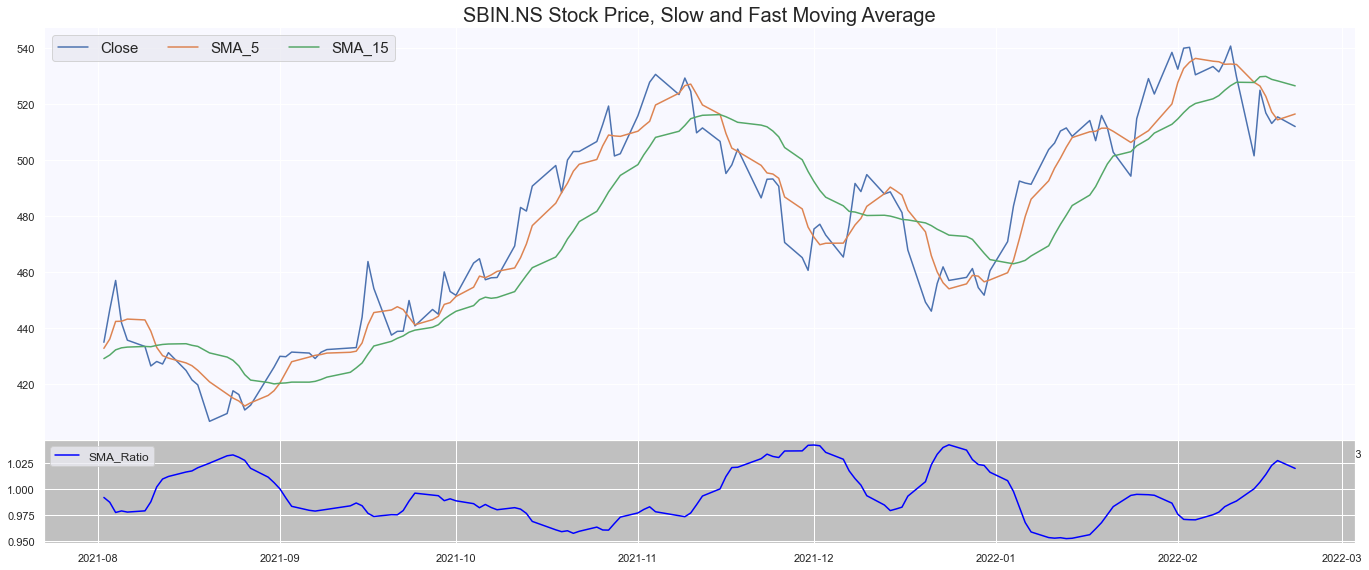

working for TATASTEEL.NS


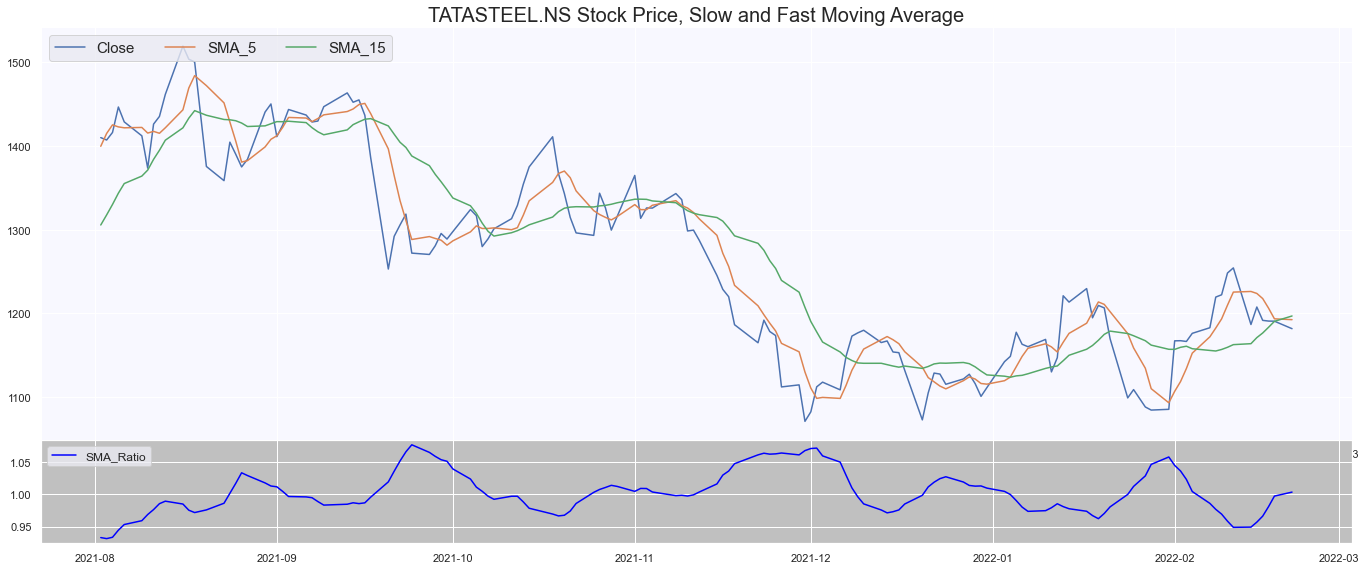

working for TCIEXP.NS


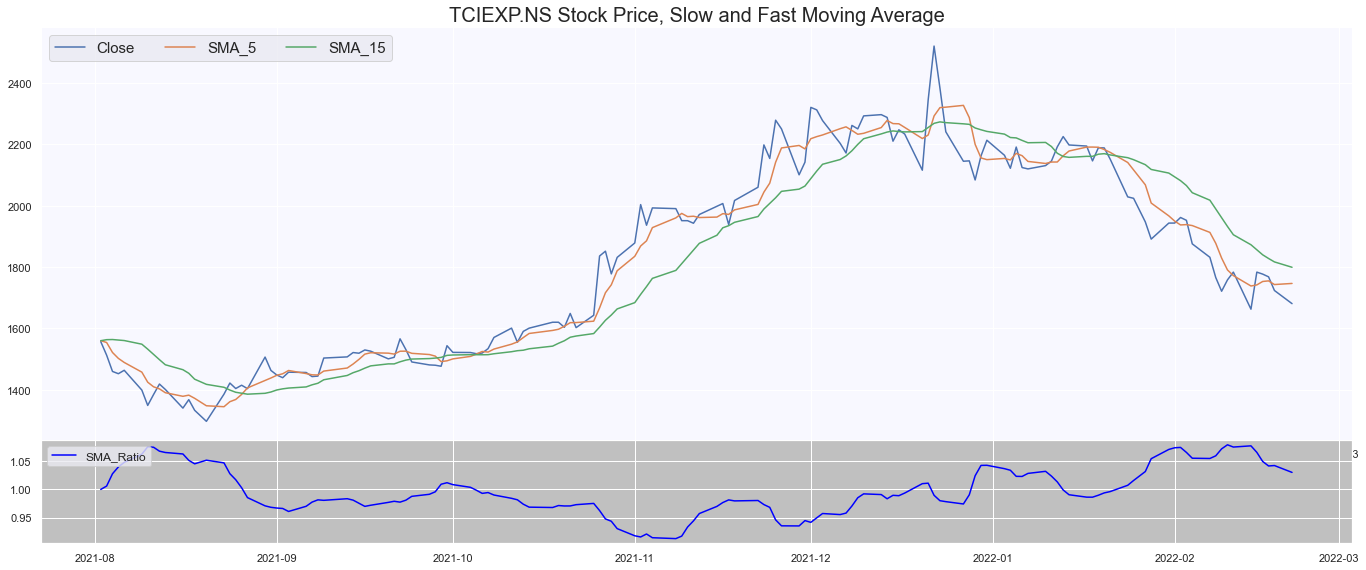

working for TRENT.NS


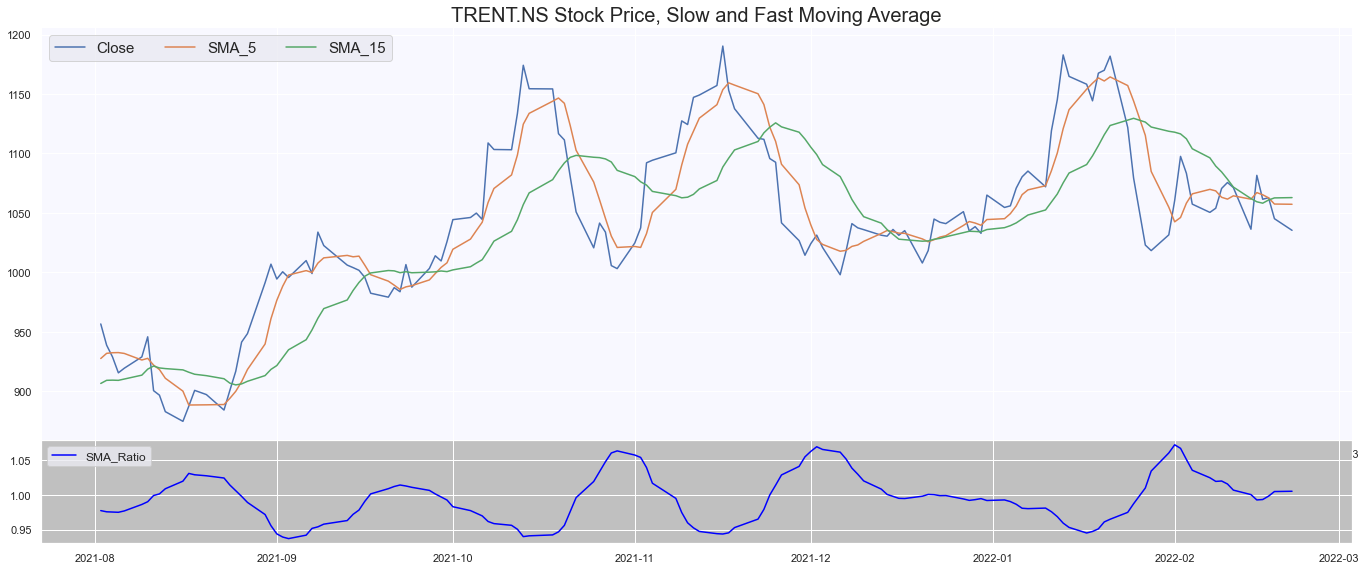

In [51]:
#Plotting
for i in tickers:
    print("working for "+i)
    start = dt.datetime.strptime('2021-8-01', '%Y-%m-%d')
#     end = dt.datetime.strptime('2021-10-09', '%Y-%m-%d')
    end = dt.date.today()
    sns.set()

    fig = plt.figure(facecolor = 'white', figsize = (20,10))

    ax0 = plt.subplot2grid((6,4), (1,0), rowspan=4, colspan=4)
    ax0.plot(all_data[all_data.symbol==i].loc[start:end,['Close','SMA_5','SMA_15']])
    ax0.set_facecolor('ghostwhite')
    ax0.legend(['Close','SMA_5','SMA_15'],ncol=3, loc = 'upper left', fontsize = 15)
    plt.title(i+" Stock Price, Slow and Fast Moving Average", fontsize = 20)

    ax1 = plt.subplot2grid((6,4), (5,0), rowspan=1, colspan=4, sharex = ax0)
    ax1.plot(all_data[all_data.symbol==i].loc[start:end,['SMA_ratio']], color = 'blue')
    ax1.legend(['SMA_Ratio'],ncol=3, loc = 'upper left', fontsize = 12)
    ax1.set_facecolor('silver')
    plt.subplots_adjust(left=.09, bottom=.09, right=1, top=.95, wspace=.20, hspace=0)
    plt.show()

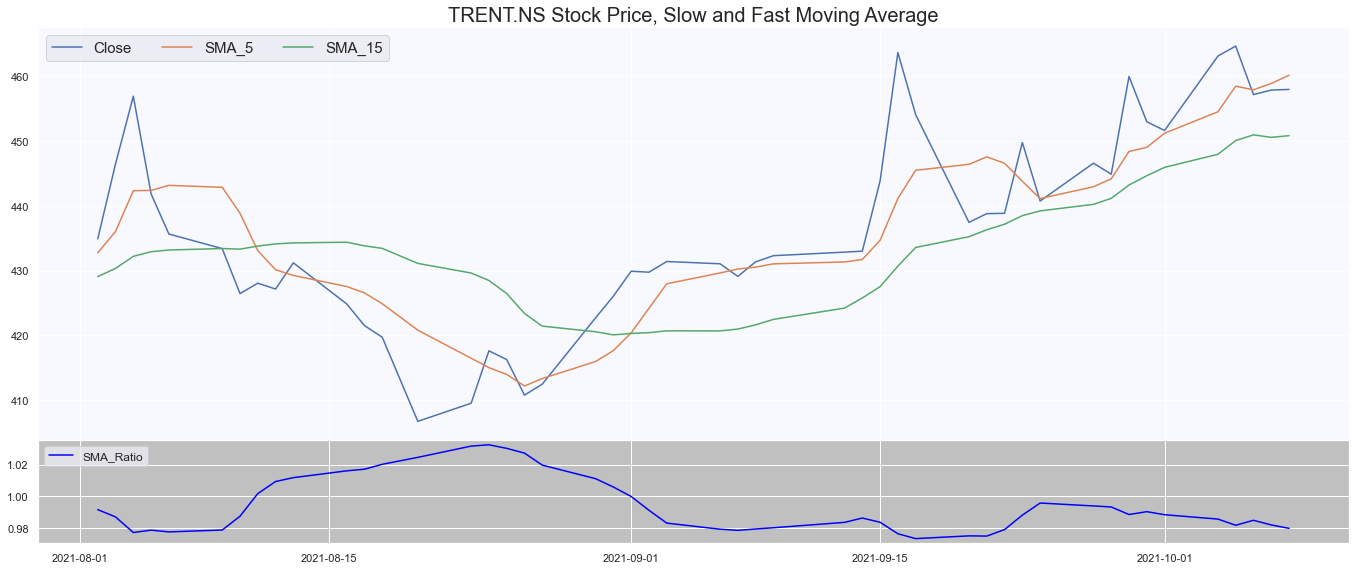

In [52]:
    start = dt.datetime.strptime('2021-8-01', '%Y-%m-%d')
    end = dt.datetime.strptime('2021-10-09', '%Y-%m-%d')
    sns.set()

    fig = plt.figure(facecolor = 'white', figsize = (20,10))

    ax0 = plt.subplot2grid((6,4), (1,0), rowspan=4, colspan=4)
    ax0.plot(all_data[all_data.symbol=='SBIN.NS'].loc[start:end,['Close','SMA_5','SMA_15']])
    ax0.set_facecolor('ghostwhite')
    ax0.legend(['Close','SMA_5','SMA_15'],ncol=3, loc = 'upper left', fontsize = 15)
    plt.title(i+" Stock Price, Slow and Fast Moving Average", fontsize = 20)

    ax1 = plt.subplot2grid((6,4), (5,0), rowspan=1, colspan=4, sharex = ax0)
    ax1.plot(all_data[all_data.symbol=='SBIN.NS'].loc[start:end,['SMA_ratio']], color = 'blue')
    ax1.legend(['SMA_Ratio'],ncol=3, loc = 'upper left', fontsize = 12)
    ax1.set_facecolor('silver')
    plt.subplots_adjust(left=.09, bottom=.09, right=1, top=.95, wspace=.20, hspace=0)
    plt.show()

In [53]:
#Simple Moving average volume
all_data['SMA5_Volume'] = all_data.groupby('symbol')['Volume'].transform(lambda x: x.rolling(window = 5).mean())
all_data['SMA15_Volume'] = all_data.groupby('symbol')['Volume'].transform(lambda x: x.rolling(window = 15).mean())
all_data['SMA_Volume_Ratio'] = all_data['SMA5_Volume']/all_data['SMA15_Volume']


In [54]:
all_data

High          Low         Open        Close     Volume  \
Date                                                                        
2021-01-01  2792.000000  2750.000000  2759.000000  2775.550049  1246698.0   
2021-01-04  2791.100098  2745.000000  2781.100098  2753.699951  1360486.0   
2021-01-05  2804.600098  2732.000000  2753.699951  2793.850098  1299589.0   
2021-01-06  2822.449951  2780.000000  2801.300049  2805.350098  1697884.0   
2021-01-07  2831.850098  2781.500000  2801.000000  2792.250000  1142806.0   
...                 ...          ...          ...          ...        ...   
2022-02-15  1086.500000  1026.000000  1037.000000  1081.599976   619460.0   
2022-02-16  1092.400024  1055.650024  1089.900024  1061.500000   343162.0   
2022-02-17  1073.150024  1052.199951  1073.150024  1062.800049   287521.0   
2022-02-18  1065.000000  1040.000000  1045.000000  1045.150024   205306.0   
2022-02-21  1054.800049  1011.000000  1045.000000  1035.349976   576587.0   

              Adj Close         symbol    return        SMA_5       SMA_15  \
Date                                                                         
2021-01-01  2758.620117  ASIANPAINT.NS       NaN          NaN          NaN   
2021-01-04  2736.903320  ASIANPAINT.NS -0.007872          NaN          NaN   
2021-01-05  2776.808350  ASIANPAINT.NS  0.014580          NaN          NaN   
2021-01-06  2788.238281  ASIANPAINT.NS  0.004116          NaN          NaN   
2021-01-07  2775.218262  ASIANPAINT.NS -0.004670  2784.140039          NaN   
...                 ...            ...       ...          ...          ...   
2022-02-15  1081.599976       TRENT.NS  0.043713  1067.089990  1059.376668   
2022-02-16  1061.500000       TRENT.NS -0.018584  1065.269995  1058.186670   
2022-02-17  1062.800049       TRENT.NS  0.001225  1062.710010  1060.843339   
2022-02-18  1045.150024       TRENT.NS -0.016607  1057.470020  1062.633341   
2022-02-21  1035.349976       TRENT.NS -0.009377  1057.280005  1062.886670   

            SMA_ratio  SMA5_Volume   SMA15_Volume  SMA_Volume_Ratio  
Date                                                                 
2021-01-01        NaN          NaN            NaN               NaN  
2021-01-04        NaN          NaN            NaN               NaN  
2021-01-05        NaN          NaN            NaN               NaN  
2021-01-06        NaN          NaN            NaN               NaN  
2021-01-07        NaN    1349492.6            NaN               NaN  
...               ...          ...            ...               ...  
2022-02-15   0.992772     705486.2  719544.800000          0.980462  
2022-02-16   0.993351     713166.8  684626.200000          1.041688  
2022-02-17   0.998243     688461.8  596340.800000          1.154477  
2022-02-18   1.004883     398301.6  528008.466667          0.754347  
2022-02-21   1.005303     406407.2  539230.666667          0.753680  

[10754 rows x 14 columns]

In [55]:
def Wilder(data, periods):
    start = np.where(~np.isnan(data))[0][0] #Check if nans present in beginning
    Wilder = np.array([np.nan]*len(data))
    Wilder[start+periods-1] = data[start:(start+periods)].mean() #Simple Moving Average
    for i in range(start+periods,len(data)):
        Wilder[i] = (Wilder[i-1]*(periods-1) + data[i])/periods #Wilder Smoothing
    return(Wilder)

all_data['prev_close'] = all_data.groupby('symbol')['Close'].shift(1)
all_data['TR'] = np.maximum((all_data['High'] - all_data['Low']), 
                     np.maximum(abs(all_data['High'] - all_data['prev_close']), 
                     abs(all_data['prev_close'] - all_data['Low'])))
for i in all_data['symbol'].unique():
    TR_data = all_data[all_data.symbol == i].copy()
    all_data.loc[all_data.symbol==i,'ATR_5'] = Wilder(TR_data['TR'], 5)
    all_data.loc[all_data.symbol==i,'ATR_15'] = Wilder(TR_data['TR'], 15)

all_data['ATR_Ratio'] = all_data['ATR_5'] / all_data['ATR_15']


all_data['prev_high'] = all_data.groupby('symbol')['High'].shift(1)
all_data['prev_low'] = all_data.groupby('symbol')['Low'].shift(1)

all_data['+DM'] = np.where(~np.isnan(all_data.prev_high),
                           np.where((all_data['High'] > all_data['prev_high']) & 
         (((all_data['High'] - all_data['prev_high']) > (all_data['prev_low'] - all_data['Low']))), 
                                                                  all_data['High'] - all_data['prev_high'], 
                                                                  0),np.nan)

all_data['-DM'] = np.where(~np.isnan(all_data.prev_low),
                           np.where((all_data['prev_low'] > all_data['Low']) & 
         (((all_data['prev_low'] - all_data['Low']) > (all_data['High'] - all_data['prev_high']))), 
                                    all_data['prev_low'] - all_data['Low'], 
                                    0),np.nan)

for i in all_data['symbol'].unique():
    ADX_data = all_data[all_data.symbol == i].copy()
    all_data.loc[all_data.symbol==i,'+DM_5'] = Wilder(ADX_data['+DM'], 5)
    all_data.loc[all_data.symbol==i,'-DM_5'] = Wilder(ADX_data['-DM'], 5)
    all_data.loc[all_data.symbol==i,'+DM_15'] = Wilder(ADX_data['+DM'], 15)
    all_data.loc[all_data.symbol==i,'-DM_15'] = Wilder(ADX_data['-DM'], 15)

all_data['+DI_5'] = (all_data['+DM_5']/all_data['ATR_5'])*100
all_data['-DI_5'] = (all_data['-DM_5']/all_data['ATR_5'])*100
all_data['+DI_15'] = (all_data['+DM_15']/all_data['ATR_15'])*100
all_data['-DI_15'] = (all_data['-DM_15']/all_data['ATR_15'])*100

all_data['DX_5'] = (np.round(abs(all_data['+DI_5'] - all_data['-DI_5'])/(all_data['+DI_5'] + all_data['-DI_5']) * 100))

all_data['DX_15'] = (np.round(abs(all_data['+DI_15'] - all_data['-DI_15'])/(all_data['+DI_15'] + all_data['-DI_15']) * 100))

for i in all_data['symbol'].unique():
    ADX_data = all_data[all_data.symbol == i].copy()
    all_data.loc[all_data.symbol==i,'ADX_5'] = Wilder(ADX_data['DX_5'], 5)
    all_data.loc[all_data.symbol==i,'ADX_15'] = Wilder(ADX_data['DX_15'], 15)
all_data

High          Low         Open        Close     Volume  \
Date                                                                        
2021-01-01  2792.000000  2750.000000  2759.000000  2775.550049  1246698.0   
2021-01-04  2791.100098  2745.000000  2781.100098  2753.699951  1360486.0   
2021-01-05  2804.600098  2732.000000  2753.699951  2793.850098  1299589.0   
2021-01-06  2822.449951  2780.000000  2801.300049  2805.350098  1697884.0   
2021-01-07  2831.850098  2781.500000  2801.000000  2792.250000  1142806.0   
...                 ...          ...          ...          ...        ...   
2022-02-15  1086.500000  1026.000000  1037.000000  1081.599976   619460.0   
2022-02-16  1092.400024  1055.650024  1089.900024  1061.500000   343162.0   
2022-02-17  1073.150024  1052.199951  1073.150024  1062.800049   287521.0   
2022-02-18  1065.000000  1040.000000  1045.000000  1045.150024   205306.0   
2022-02-21  1054.800049  1011.000000  1045.000000  1035.349976   576587.0   

              Adj Close         symbol    return        SMA_5       SMA_15  \
Date                                                                         
2021-01-01  2758.620117  ASIANPAINT.NS       NaN          NaN          NaN   
2021-01-04  2736.903320  ASIANPAINT.NS -0.007872          NaN          NaN   
2021-01-05  2776.808350  ASIANPAINT.NS  0.014580          NaN          NaN   
2021-01-06  2788.238281  ASIANPAINT.NS  0.004116          NaN          NaN   
2021-01-07  2775.218262  ASIANPAINT.NS -0.004670  2784.140039          NaN   
...                 ...            ...       ...          ...          ...   
2022-02-15  1081.599976       TRENT.NS  0.043713  1067.089990  1059.376668   
2022-02-16  1061.500000       TRENT.NS -0.018584  1065.269995  1058.186670   
2022-02-17  1062.800049       TRENT.NS  0.001225  1062.710010  1060.843339   
2022-02-18  1045.150024       TRENT.NS -0.016607  1057.470020  1062.633341   
2022-02-21  1035.349976       TRENT.NS -0.009377  1057.280005  1062.886670   

            ...    +DM_15     -DM_15      +DI_5      -DI_5     +DI_15  \
Date        ...                                                         
2021-01-01  ...       NaN        NaN        NaN        NaN        NaN   
2021-01-04  ...       NaN        NaN        NaN        NaN        NaN   
2021-01-05  ...       NaN        NaN        NaN        NaN        NaN   
2021-01-06  ...       NaN        NaN        NaN        NaN        NaN   
2021-01-07  ...       NaN        NaN        NaN        NaN        NaN   
...         ...       ...        ...        ...        ...        ...   
2022-02-15  ...  9.683381   9.892473  26.413060  22.441834  22.101714   
2022-02-16  ...  9.431157   9.232974  24.650310  18.622837  21.759881   
2022-02-17  ...  8.802414   8.847448  21.984409  18.389801  21.033668   
2022-02-18  ...  8.215586   9.070948  18.930548  22.614064  20.172886   
2022-02-21  ...  7.667880  10.399551  14.514910  32.783011  18.733753   

               -DI_15  DX_5  DX_15      ADX_5     ADX_15  
Date                                                      
2021-01-01        NaN   NaN    NaN        NaN        NaN  
2021-01-04        NaN   NaN    NaN        NaN        NaN  
2021-01-05        NaN   NaN    NaN        NaN        NaN  
2021-01-06        NaN   NaN    NaN        NaN        NaN  
2021-01-07        NaN   NaN    NaN        NaN        NaN  
...               ...   ...    ...        ...        ...  
2022-02-15  22.578952   8.0    1.0  21.018742  14.674026  
2022-02-16  21.302626  14.0    1.0  19.614994  13.762424  
2022-02-17  21.141278   9.0    0.0  17.491995  12.844929  
2022-02-18  22.273176   9.0    5.0  15.793596  12.321934  
2022-02-21  25.407625  39.0   15.0  20.434877  12.500472  

[10754 rows x 35 columns]

In [56]:
all_data['Lowest_5D'] = all_data.groupby('symbol')['Low'].transform(lambda x: x.rolling(window = 5).min())
all_data['High_5D'] = all_data.groupby('symbol')['High'].transform(lambda x: x.rolling(window = 5).max())
all_data['Lowest_15D'] = all_data.groupby('symbol')['Low'].transform(lambda x: x.rolling(window = 15).min())
all_data['High_15D'] = all_data.groupby('symbol')['High'].transform(lambda x: x.rolling(window = 15).max())

all_data['Stochastic_5'] = ((all_data['Close'] - all_data['Lowest_5D'])/(all_data['High_5D'] - all_data['Lowest_5D']))*100
all_data['Stochastic_15'] = ((all_data['Close'] - all_data['Lowest_15D'])/(all_data['High_15D'] - all_data['Lowest_15D']))*100

all_data['Stochastic_%D_5'] = all_data['Stochastic_5'].rolling(window = 5).mean()
all_data['Stochastic_%D_15'] = all_data['Stochastic_5'].rolling(window = 15).mean()

all_data['Stochastic_Ratio'] = all_data['Stochastic_%D_5']/all_data['Stochastic_%D_15']
all_data

High          Low         Open        Close     Volume  \
Date                                                                        
2021-01-01  2792.000000  2750.000000  2759.000000  2775.550049  1246698.0   
2021-01-04  2791.100098  2745.000000  2781.100098  2753.699951  1360486.0   
2021-01-05  2804.600098  2732.000000  2753.699951  2793.850098  1299589.0   
2021-01-06  2822.449951  2780.000000  2801.300049  2805.350098  1697884.0   
2021-01-07  2831.850098  2781.500000  2801.000000  2792.250000  1142806.0   
...                 ...          ...          ...          ...        ...   
2022-02-15  1086.500000  1026.000000  1037.000000  1081.599976   619460.0   
2022-02-16  1092.400024  1055.650024  1089.900024  1061.500000   343162.0   
2022-02-17  1073.150024  1052.199951  1073.150024  1062.800049   287521.0   
2022-02-18  1065.000000  1040.000000  1045.000000  1045.150024   205306.0   
2022-02-21  1054.800049  1011.000000  1045.000000  1035.349976   576587.0   

              Adj Close         symbol    return        SMA_5       SMA_15  \
Date                                                                         
2021-01-01  2758.620117  ASIANPAINT.NS       NaN          NaN          NaN   
2021-01-04  2736.903320  ASIANPAINT.NS -0.007872          NaN          NaN   
2021-01-05  2776.808350  ASIANPAINT.NS  0.014580          NaN          NaN   
2021-01-06  2788.238281  ASIANPAINT.NS  0.004116          NaN          NaN   
2021-01-07  2775.218262  ASIANPAINT.NS -0.004670  2784.140039          NaN   
...                 ...            ...       ...          ...          ...   
2022-02-15  1081.599976       TRENT.NS  0.043713  1067.089990  1059.376668   
2022-02-16  1061.500000       TRENT.NS -0.018584  1065.269995  1058.186670   
2022-02-17  1062.800049       TRENT.NS  0.001225  1062.710010  1060.843339   
2022-02-18  1045.150024       TRENT.NS -0.016607  1057.470020  1062.633341   
2022-02-21  1035.349976       TRENT.NS -0.009377  1057.280005  1062.886670   

            ...     ADX_15  Lowest_5D      High_5D   Lowest_15D  High_15D  \
Date        ...                                                             
2021-01-01  ...        NaN        NaN          NaN          NaN       NaN   
2021-01-04  ...        NaN        NaN          NaN          NaN       NaN   
2021-01-05  ...        NaN        NaN          NaN          NaN       NaN   
2021-01-06  ...        NaN        NaN          NaN          NaN       NaN   
2021-01-07  ...        NaN     2732.0  2831.850098          NaN       NaN   
...         ...        ...        ...          ...          ...       ...   
2022-02-15  ...  14.674026     1017.0  1099.550049  1001.349976   1113.25   
2022-02-16  ...  13.762424     1017.0  1099.550049  1001.349976   1107.00   
2022-02-17  ...  12.844929     1017.0  1099.550049  1008.349976   1107.00   
2022-02-18  ...  12.321934     1017.0  1092.400024  1017.000000   1107.00   
2022-02-21  ...  12.500472     1011.0  1092.400024  1011.000000   1107.00   

            Stochastic_5  Stochastic_15  Stochastic_%D_5  Stochastic_%D_15  \
Date                                                                         
2021-01-01           NaN            NaN              NaN               NaN   
2021-01-04           NaN            NaN              NaN               NaN   
2021-01-05           NaN            NaN              NaN               NaN   
2021-01-06           NaN            NaN              NaN               NaN   
2021-01-07     60.340452            NaN              NaN               NaN   
...                  ...            ...              ...               ...   
2022-02-15     78.255527      71.715802        60.490878         45.651382   
2022-02-16     53.906691      56.933280        59.112223         48.050856   
2022-02-17     55.481553      55.195195        54.639310         51.047871   
2022-02-18     37.334238      31.277805        49.671565         52.986138   
2022-02-21     29.913966      25.364558        50.978395        

In [57]:
all_data['Diff'] = all_data.groupby('symbol')['Close'].transform(lambda x: x.diff())
all_data['Up'] = all_data['Diff']
all_data.loc[(all_data['Up']<0), 'Up'] = 0

all_data['Down'] = all_data['Diff']
all_data.loc[(all_data['Down']>0), 'Down'] = 0 
all_data['Down'] = abs(all_data['Down'])

all_data['avg_5up'] = all_data.groupby('symbol')['Up'].transform(lambda x: x.rolling(window=5).mean())
all_data['avg_5down'] = all_data.groupby('symbol')['Down'].transform(lambda x: x.rolling(window=5).mean())

all_data['avg_15up'] = all_data.groupby('symbol')['Up'].transform(lambda x: x.rolling(window=15).mean())
all_data['avg_15down'] = all_data.groupby('symbol')['Down'].transform(lambda x: x.rolling(window=15).mean())

all_data['RS_5'] = all_data['avg_5up'] / all_data['avg_5down']
all_data['RS_15'] = all_data['avg_15up'] / all_data['avg_15down']

all_data['RSI_5'] = 100 - (100/(1+all_data['RS_5']))
all_data['RSI_15'] = 100 - (100/(1+all_data['RS_15']))

all_data['RSI_ratio'] = all_data['RSI_5']/all_data['RSI_15']
all_data

High          Low         Open        Close     Volume  \
Date                                                                        
2021-01-01  2792.000000  2750.000000  2759.000000  2775.550049  1246698.0   
2021-01-04  2791.100098  2745.000000  2781.100098  2753.699951  1360486.0   
2021-01-05  2804.600098  2732.000000  2753.699951  2793.850098  1299589.0   
2021-01-06  2822.449951  2780.000000  2801.300049  2805.350098  1697884.0   
2021-01-07  2831.850098  2781.500000  2801.000000  2792.250000  1142806.0   
...                 ...          ...          ...          ...        ...   
2022-02-15  1086.500000  1026.000000  1037.000000  1081.599976   619460.0   
2022-02-16  1092.400024  1055.650024  1089.900024  1061.500000   343162.0   
2022-02-17  1073.150024  1052.199951  1073.150024  1062.800049   287521.0   
2022-02-18  1065.000000  1040.000000  1045.000000  1045.150024   205306.0   
2022-02-21  1054.800049  1011.000000  1045.000000  1035.349976   576587.0   

              Adj Close         symbol    return        SMA_5       SMA_15  \
Date                                                                         
2021-01-01  2758.620117  ASIANPAINT.NS       NaN          NaN          NaN   
2021-01-04  2736.903320  ASIANPAINT.NS -0.007872          NaN          NaN   
2021-01-05  2776.808350  ASIANPAINT.NS  0.014580          NaN          NaN   
2021-01-06  2788.238281  ASIANPAINT.NS  0.004116          NaN          NaN   
2021-01-07  2775.218262  ASIANPAINT.NS -0.004670  2784.140039          NaN   
...                 ...            ...       ...          ...          ...   
2022-02-15  1081.599976       TRENT.NS  0.043713  1067.089990  1059.376668   
2022-02-16  1061.500000       TRENT.NS -0.018584  1065.269995  1058.186670   
2022-02-17  1062.800049       TRENT.NS  0.001225  1062.710010  1060.843339   
2022-02-18  1045.150024       TRENT.NS -0.016607  1057.470020  1062.633341   
2022-02-21  1035.349976       TRENT.NS -0.009377  1057.280005  1062.886670   

            ...       Down    avg_5up  avg_5down   avg_15up  avg_15down  \
Date        ...                                                           
2021-01-01  ...        NaN        NaN        NaN        NaN         NaN   
2021-01-04  ...  21.850098        NaN        NaN        NaN         NaN   
2021-01-05  ...   0.000000        NaN        NaN        NaN         NaN   
2021-01-06  ...   0.000000        NaN        NaN        NaN         NaN   
2021-01-07  ...  13.100098        NaN        NaN        NaN         NaN   
...         ...        ...        ...        ...        ...         ...   
2022-02-15  ...   0.000000  13.389990   7.859985   9.980001   12.669999   
2022-02-16  ...  20.099976  10.059985  11.879980   9.980001   11.169999   
2022-02-17  ...   0.000000   9.319995  11.879980  10.066671    7.410002   
2022-02-18  ...  17.650024   9.319995  14.559985  10.066671    8.276668   
2022-02-21  ...   9.800049   9.319995   9.510010   9.183333    8.930005   

                RS_5     RS_15      RSI_5     RSI_15  RSI_ratio  
Date                                                             
2021-01-01       NaN       NaN        NaN        NaN        NaN  
2021-01-04       NaN       NaN        NaN        NaN        NaN  
2021-01-05       NaN       NaN        NaN        NaN        NaN  
2021-01-06       NaN       NaN        NaN        NaN        NaN  
2021-01-07       NaN       NaN        NaN        NaN        NaN  
...              ...       ...        ...        ...        ...  
2022-02-15  1.703564  0.787688  63.011791  44.061814   1.430077  
2022-02-16  0.846802  0.893465  45.852329  47.186765   0.971720  
2022-02-17  0.784513  1.358525  43.962292  57.600615   0.763226  
2022-02-18  0.640110  1.216271  39.028487  54.879162   0.711171  
2022-02-21  0.980020  1.028368  49.495447  50.699287   0.976255  

[10754 rows x 56 columns]

In [58]:
all_data['5Ewm'] = all_data.groupby('symbol')['Close'].transform(lambda x: x.ewm(span=5, adjust=False).mean())
all_data['15Ewm'] = all_data.groupby('symbol')['Close'].transform(lambda x: x.ewm(span=15, adjust=False).mean())
all_data['MACD'] = all_data['15Ewm'] - all_data['5Ewm']

In [59]:
all_data['15MA'] = all_data.groupby('symbol')['Close'].transform(lambda x: x.rolling(window=15).mean())
all_data['SD'] = all_data.groupby('symbol')['Close'].transform(lambda x: x.rolling(window=15).std())
all_data['upperband'] = all_data['15MA'] + 2*all_data['SD']
all_data['lowerband'] = all_data['15MA'] - 2*all_data['SD']

In [62]:
# all_data[all_data['symbol']=='ITC.NS']
feb_data = all_data.loc['2022-02-21']
feb_data[feb_data['SMA_5'] > feb_data['SMA_15']]
feb_data.to_csv('feb.csv')

In [64]:
print(feb_data[feb_data['SMA_5'] < feb_data['SMA_15']])

                   High          Low         Open        Close      Volume  \
Date                                                                         
2022-02-21   201.850006   196.850006   198.000000   198.149994   3489666.0   
2022-02-21   716.549988   703.000000   708.049988   709.950012   4307146.0   
2022-02-21   554.900024   541.700012   545.450012   553.599976   1157056.0   
2022-02-21   825.400024   801.799988   823.000000   809.000000    548136.0   
2022-02-21   221.300003   217.149994   220.300003   218.000000  16122189.0   
2022-02-21  3020.000000  2909.000000  2988.000000  2981.300049    670704.0   
2022-02-21  1851.300049  1802.099976  1808.000000  1827.099976   1343832.0   
2022-02-21  1883.900024  1848.849976  1874.949951  1863.949951   1262448.0   
2022-02-21  8724.250000  8443.599609  8544.049805  8612.700195    625924.0   
2022-02-21  2453.300049  2398.800049  2413.000000  2426.300049    187409.0   
2022-02-21  1440.000000  1410.099976  1427.150024  1418.199951  

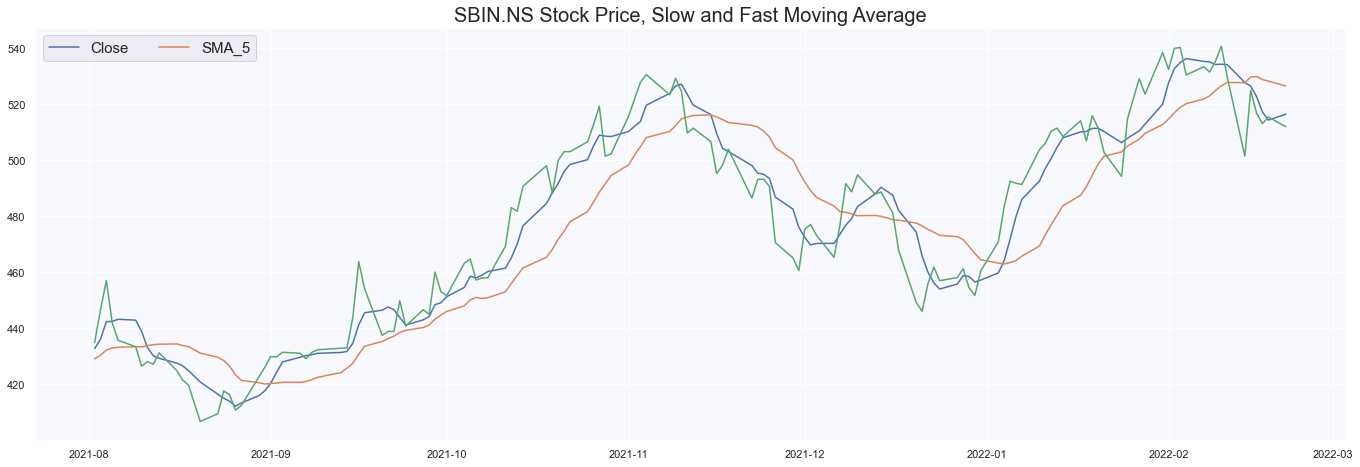

In [134]:

    start = dt.datetime.strptime('2021-8-01', '%Y-%m-%d')
    end = dt.date.today()
    
    sns.set()
    from scipy.signal import argrelextrema
    tmp = all_data[all_data.symbol =='SBIN.NS'].loc[start:end,['Close']]
    tmp_nparray = tmp.to_numpy()
# tmp_nparray[0]
    local_max = argrelextrema(tmp_nparray, np.greater)

    fig = plt.figure(facecolor = 'white', figsize = (20,10))

    ax0 = plt.subplot2grid((6,4), (1,0), rowspan=4, colspan=4)
    ax0.plot(all_data[all_data.symbol=='SBIN.NS'].loc[start:end,['SMA_5','SMA_15']])
    ax0.set_facecolor('ghostwhite')
  
    ax0.legend(['Close','SMA_5','SMA_15'],ncol=3, loc = 'upper left', fontsize = 15)
    ax0.plot(all_data[all_data.symbol=='SBIN.NS'].loc[start:end,['Close']],)
#     ax0.plot(tmp_nparray)
    plt.title("SBIN.NS"+" Stock Price, Slow and Fast Moving Average", fontsize = 20)

#     ax1 = plt.subplot2grid((6,4), (5,0), rowspan=1, colspan=4, sharex = ax0)
#     ax1.plot(all_data[all_data.symbol=='SBIN.NS'].loc[start:end,['SMA_ratio']], color = 'blue')
#     ax1.legend(['SMA_Ratio'],ncol=3, loc = 'upper left', fontsize = 12)
#     ax1.set_facecolor('silver')
    plt.subplots_adjust(left=.09, bottom=.09, right=1, top=.95, wspace=.20, hspace=0)
    plt.show()

In [181]:

# from scipy.signal import argrelextrema
# tmp = all_data[all_data.symbol =='SBIN.NS'].loc[start:end,['Close']]
# tmp_nparray = tmp.to_numpy()
# tmp_nparray
# argrelextrema(df.data.values, np.less_equal,
#                     order=n)[0]]['data']

single_stock_df = all_data[all_data.symbol =='TECHM.NS']

single_stock_df['max_local'] = single_stock_df.iloc[argrelextrema(single_stock_df['15Ewm'].values,np.greater)[0]]['15Ewm']
# all_data['min_local']=all_data.iloc[argrelextrema(all_data.Close.values,np.less)[0]]['Close']
single_stock_df['min_local'] = single_stock_df.iloc[argrelextrema(single_stock_df['15Ewm'].values,np.less)[0]]['15Ewm']
single_stock_df.to_csv('singlestock.csv')

<ipython-input-181-72c539ad43dd>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  single_stock_df['max_local'] = single_stock_df.iloc[argrelextrema(single_stock_df['15Ewm'].values,np.greater)[0]]['15Ewm']
<ipython-input-181-72c539ad43dd>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  single_stock_df['min_local'] = single_stock_df.iloc[argrelextrema(single_stock_df['15Ewm'].values,np.less)[0]]['15Ewm']


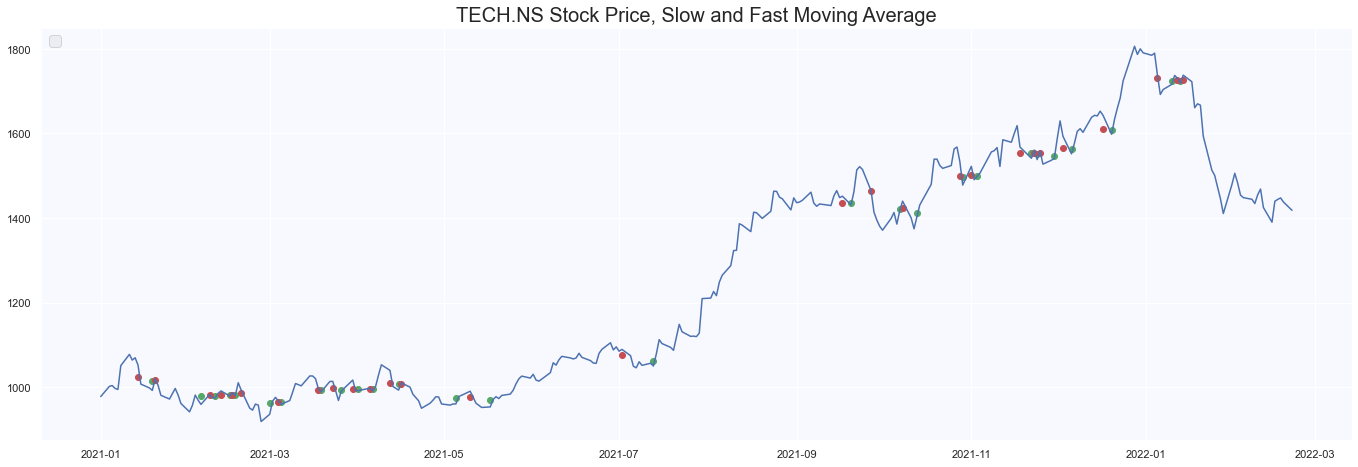

In [180]:

    start = dt.datetime.strptime('2021-1-01', '%Y-%m-%d')
    end = dt.date.today()
    
    sns.set()
    
    fig = plt.figure(facecolor = 'white', figsize = (20,10))

    ax0 = plt.subplot2grid((6,4), (1,0), rowspan=4, colspan=4)
#     ax0.plot(single_stock_df.loc[start:end,['SMA_5','SMA_15']])
    ax0.set_facecolor('ghostwhite')
  
    ax0.legend(['Close','SMA_5','SMA_15'],ncol=3, loc = 'upper left', fontsize = 15)
    ax0.plot(single_stock_df.loc[start:end,['Close']],)
#     ax0.plot(tmp_nparray)
    plt.title("TECH.NS"+" Stock Price, Slow and Fast Moving Average", fontsize = 20)
    plt.scatter(single_stock_df.index,single_stock_df['min_local'],c='g')
    plt.scatter(single_stock_df.index,single_stock_df['max_local'],c='r')
#     ax1 = plt.subplot2grid((6,4), (5,0), rowspan=1, colspan=4, sharex = ax0)
#     ax1.plot(all_data[all_data.symbol=='SBIN.NS'].loc[start:end,['SMA_ratio']], color = 'blue')
#     ax1.legend(['SMA_Ratio'],ncol=3, loc = 'upper left', fontsize = 12)
#     ax1.set_facecolor('silver')
    plt.subplots_adjust(left=.09, bottom=.09, right=1, top=.95, wspace=.20, hspace=0)
    plt.show()


In [66]:
# all_data.columns
cols = ['symbol','High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 
       'return', 'SMA_5', 'SMA_15', 'SMA_ratio', 'SMA5_Volume', 'SMA15_Volume',
       'SMA_Volume_Ratio', 'prev_close', 'TR', 'ATR_5', 'ATR_15', 'ATR_Ratio',
       'prev_high', 'prev_low', '+DM', '-DM', '+DM_5', '-DM_5', '+DM_15',
       '-DM_15', '+DI_5', '-DI_5', '+DI_15', '-DI_15', 'DX_5', 'DX_15',
       'ADX_5', 'ADX_15', 'Lowest_5D', 'High_5D', 'Lowest_15D', 'High_15D',
       'Stochastic_5', 'Stochastic_15', 'Stochastic_%D_5', 'Stochastic_%D_15',
       'Stochastic_Ratio', 'Diff', 'Up', 'Down', 'avg_5up', 'avg_5down',
       'avg_15up', 'avg_15down', 'RS_5', 'RS_15', 'RSI_5', 'RSI_15',
       'RSI_ratio', '5Ewm', '15Ewm', 'MACD', '15MA', 'SD', 'upperband',
       'lowerband']
all_data = all_data[cols]
all_data

symbol         High          Low         Open        Close  \
Date                                                                            
2021-01-01  ASIANPAINT.NS  2792.000000  2750.000000  2759.000000  2775.550049   
2021-01-04  ASIANPAINT.NS  2791.100098  2745.000000  2781.100098  2753.699951   
2021-01-05  ASIANPAINT.NS  2804.600098  2732.000000  2753.699951  2793.850098   
2021-01-06  ASIANPAINT.NS  2822.449951  2780.000000  2801.300049  2805.350098   
2021-01-07  ASIANPAINT.NS  2831.850098  2781.500000  2801.000000  2792.250000   
...                   ...          ...          ...          ...          ...   
2022-02-15       TRENT.NS  1086.500000  1026.000000  1037.000000  1081.599976   
2022-02-16       TRENT.NS  1092.400024  1055.650024  1089.900024  1061.500000   
2022-02-17       TRENT.NS  1073.150024  1052.199951  1073.150024  1062.800049   
2022-02-18       TRENT.NS  1065.000000  1040.000000  1045.000000  1045.150024   
2022-02-21       TRENT.NS  1054.800049  1011.000000  1045.000000  1035.349976   

               Volume    Adj Close    return        SMA_5       SMA_15  ...  \
Date                                                                    ...   
2021-01-01  1246698.0  2758.620117       NaN          NaN          NaN  ...   
2021-01-04  1360486.0  2736.903320 -0.007872          NaN          NaN  ...   
2021-01-05  1299589.0  2776.808350  0.014580          NaN          NaN  ...   
2021-01-06  1697884.0  2788.238281  0.004116          NaN          NaN  ...   
2021-01-07  1142806.0  2775.218262 -0.004670  2784.140039          NaN  ...   
...               ...          ...       ...          ...          ...  ...   
2022-02-15   619460.0  1081.599976  0.043713  1067.089990  1059.376668  ...   
2022-02-16   343162.0  1061.500000 -0.018584  1065.269995  1058.186670  ...   
2022-02-17   287521.0  1062.800049  0.001225  1062.710010  1060.843339  ...   
2022-02-18   205306.0  1045.150024 -0.016607  1057.470020  1062.633341  ...   
2022-02-21   576587.0  1035.349976 -0.009377  1057.280005  1062.886670  ...   

                RSI_5     RSI_15  RSI_ratio         5Ewm        15Ewm  \
Date                                                                    
2021-01-01        NaN        NaN        NaN  2775.550049  2775.550049   
2021-01-04        NaN        NaN        NaN  2768.266683  2772.818787   
2021-01-05        NaN        NaN        NaN  2776.794488  2775.447701   
2021-01-06        NaN        NaN        NaN  2786.313024  2779.185500   
2021-01-07        NaN        NaN        NaN  2788.292016  2780.818563   
...               ...        ...        ...          ...          ...   
2022-02-15  63.011791  44.061814   1.430077  1065.840190  1071.829328   
2022-02-16  45.852329  47.186765   0.971720  1064.393460  1070.538162   
2022-02-17  43.962292  57.600615   0.763226  1063.862323  1069.570898   
2022-02-18  39.028487  54.879162   0.711171  1057.624890  1066.518289   
2022-02-21  49.495447  50.699287   0.976255  1050.199919  1062.622250   

                 MACD         15MA         SD    upperband    lowerband  
Date                                                                     
2021-01-01   0.000000          NaN        NaN          NaN          NaN  
2021-01-04   4.552104          NaN        NaN          NaN          NaN  
2021-01-05  -1.346787          NaN        NaN          NaN          NaN  
2021-01-06  -7.127524          NaN        NaN          NaN          NaN  
2021-01-07  -7.473454          NaN        NaN          NaN          NaN  
...               ...          ...        ...          ...          ...  
2022-02-15   5.989138  1059.376668  23.739656  1106.855981  1011.897356  
2022-02-16   6.144702  1058.186670  23.105862  1104.398394  1011.974946  
2022-02-17   5.708575  1060.843339  20.955948  1102.755236  1018.931442  
2022-02-18   8.893399  1062.633341  18.000807  1098.634955  1026.631728  
2022-02-21  12.422331  1062.886670  17.553296  1097.993263  1027.780077  

[10754 rows x 63 columns